## Comparison between precipitation features and convective cells based on CTT 

**Notes:** 
    

*Method section*

- lifetime: tb cold, smallscale
- seasonal curve: all, TP, outside of TP
- area: tb cold, small scale 
- total nr of tracks 


*Spatial and Temporal characteristics*

- distribution for propagation speed, lifetime, area and seasonal curve for classes
- density plots for four classes 



*Precipitation*

- plot with contribution of total precip > 3000m, from heavy precip > 5mm which are non contiguous/isolated (local precip), contiguous in space (at least 10 pixels), contiguous in space and time (10 pixels and 3 hours), incorporated in precipitating cloud system (combined tracking) 




**TODO**

- complete table to compare different methods  



## get tracks for one year 

In [1]:
import pandas as pd
import numpy as np
import tobac 
import cartopy
import cartopy.crs as ccrs

In [978]:
preciptracks.shape

(2320609, 19)

In [983]:
# read in precip tracks 
y= 2000


precipfile = '/media/juli/Elements/gpm_v06/Save/2000_2019/Tracks_GPM_'+ str(y) + '_TPflag.h5'
ptracks= pd.read_hdf(precipfile, 'table')
preciptracks = ptracks[ptracks.cell >= 0]
preciptracks.timestr = pd.to_datetime(preciptracks.timestr)


# read in CTT tracks heavy rain core 
tp = '/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/smallscale/Tracks_'+str(y)+'_heavyraincorefiltered.h5'
tptracks= pd.read_hdf(tp, 'table')
tptracks.timestr = pd.to_datetime(tptracks.timestr)



# read in CTT tracks heavy rain core 
tbb = '/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/tbbtracking/Tracks_'+str(y)+'_geometry.h5'
tbbtracks= pd.read_hdf(tbb, 'table')
tbbtracks.timestr = pd.to_datetime(tbbtracks.timestr)
tbbtracks= tobac.calculate_velocity(tbbtracks, method_distance=None)


# read in CTT tracks cold core 
tbb = '/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/tbbtracking/Tracks_'+ str(y)+'_cold_core.h5'
tbbcold= pd.read_hdf(tbb, 'table')
tbbcold.timestr = pd.to_datetime(tbbcold.timestr)


# read in CTT tracks only tbb 
tbb = '/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/tbbtracking/Tracks__'+ str(y)+'.h5'
tbb= pd.read_hdf(tbb, 'table')
tbb.timestr = pd.to_datetime(tbb.timestr)

## get tracks for all years : 2000 - 2019 

In [984]:
# read in cells from precip tracking 
years = np.arange(2001,2020)

for y in years:
    print(y)
    # read in precip tracks 
    f = '/media/juli/Elements/gpm_v06/Save/2000_2019/Tracks_GPM_'+ str(y) + '_TPflag.h5'
    ptracks= pd.read_hdf(f, 'table')
    # remove nan values to only save the linked features                                                                                                       
    ptracks = ptracks[ptracks.cell >= 0]
    ptracks.timestr = pd.to_datetime(ptracks.timestr)
    preciptracks = preciptracks.append(ptracks)
    
    
        
    # read in CTT tracks heavy rain core 
    f = '/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/smallscale/Tracks_'+str(y)+'_heavyraincorefiltered.h5'
    smallscale= pd.read_hdf(f, 'table')
    smallscale.timestr = pd.to_datetime(smallscale.timestr)
    tptracks = tptracks.append(smallscale)

    
     # read in CTT tracks heavy rain core 
    f = '/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/tbbtracking/Tracks_'+str(y)+'_geometry.h5'
    tbhtracks= pd.read_hdf(f, 'table')
    tbhtracks.timestr = pd.to_datetime(tbhtracks.timestr)
    tbhtracks= tobac.calculate_velocity(tbhtracks, method_distance=None)
    tbbtracks = tbbtracks.append(tbhtracks)


    # read in CTT tracks cold core 
    f = '/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/tbbtracking/Tracks_'+ str(y)+'_cold_core.h5'
    tbccold= pd.read_hdf(f, 'table')
    tbccold.timestr = pd.to_datetime(tbccold.timestr)
    tbbcold = tbbcold.append(tbccold)


    # read in CTT tracks only tbb 
    f = '/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/tbbtracking/Tracks__'+ str(y)+'.h5'
    tb= pd.read_hdf(f, 'table')
    tb.timestr = pd.to_datetime(tb.timestr)   
    tbb = tbb.append(tb)

2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


## get cells for one season

In [36]:
# get only summer cells 
tracks = preciptracks
for i in np.unique(tracks.time.values):
    if i.month not in [6,7, 8]:
        tracks.drop(tracks.loc[tracks['time']== i].index, inplace=True)

In [37]:
summertracks = tracks 
summertracks.to_hdf('/media/juli/Elements/gpm_v06/Save/Tracks_GPM_2000_2019_JJA.h5', 'table')
n= np.unique(summertracks.timestr).shape[0]
n / (48*90*20) * 100

40.58796296296296

## Diurnal cycle 

In [606]:
# function to get seasonal curve of tracks
def get_diurnal_cycle(preciptracks):
    preciptracks['hour']= preciptracks.timestr.dt.hour
    diurnal=[]
    for h in np.arange(0,23):
        count = preciptracks[preciptracks.hour == h].shape[0]
        #meanvalue= np.nanmean(preciptracks.total_precip.values)
        diurnal.append(count)
    return diurnal

In [607]:
def get_diurnal_init(preciptracks):
    preciptracks['hour']= preciptracks.timestr.dt.hour
    diurnal=[]
    for cell in np.unique(preciptracks.cell.values):
        init_hour = preciptracks[preciptracks.cell == cell].hour.values[0]
        diurnal.append(init_hour)
    return diurnal

In [660]:
def get_diurnal_diss(preciptracks):
    preciptracks['hour']= preciptracks.timestr.dt.hour
    diurnal=[]
    for cell in np.unique(preciptracks.cell.values):
        init_hour = preciptracks[preciptracks.cell == cell].hour.values[-1]
        diurnal.append(init_hour)
    return diurnal

In [713]:
# get dataframe with max values 

def get_max_values(tracks):
    tracks['hour']= tracks.timestr.dt.hour
    peak_frame = pd.DataFrame(columns = tracks.columns)
    rain_peak = []
    for cell in np.unique(tracks.cell.values):
        subset= tracks[tracks.cell == cell]
        peak = np.nanmax(subset.total_precip.values)
        hour = subset[subset.total_precip == peak].hour.values[0]
        # add row to dataframe 
        #peak_frame = pd.concat([peak_frame, rain_peak ], ignore_index=True)
        rain_peak.append(hour)
    rain_histo = np.histogram(rain_peak, bins = np.arange(0,24))
    return rain_histo[0]


In [714]:
init_hours = get_diurnal_init(conv_tp)
init_hours = np.array(init_hours)
init_hours, bins = np.histogram(init_hours, bins = np.arange(0,24))
diss_hours = get_diurnal_diss(conv_tp)
diss_hours = np.array(diss_hours)
diss_hours, bins = np.histogram(diss_hours, bins = np.arange(0,24))

In [2065]:
diurnal_precip = get_diurnal_cycle(tracks_N)
diurnal_tbb_rain= get_diurnal_cycle(tracks_E)
diurnal_tbb_cold= get_diurnal_cycle(tracks_n)
diurnal_tbb= get_diurnal_cycle(tracks_e)


In [716]:
diurnal_tp = get_diurnal_cycle(conv_tp)
diurnal_tp_init = get_diurnal_init(conv_tp)

diurnal_precip = get_max_values(conv_tp)


In [611]:
diurnal_precip = conv_tp.groupby('hour').mean()['convective_precip']

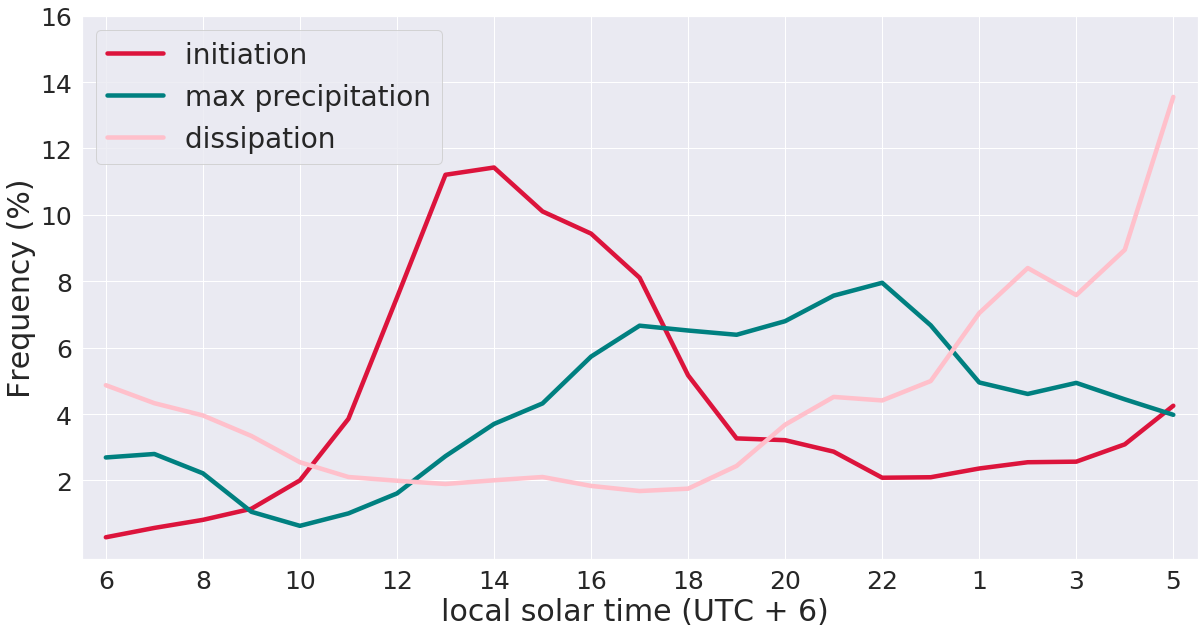

In [724]:

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()


a= np.arange(0,18) + 6 
b= np.arange(1,6)
localtime= np.append(a, b)


plt.figure(figsize=(20,10))
from scipy.ndimage.filters import gaussian_filter1d
init = gaussian_filter1d(init_hours/np.nansum(init_hours) *100, sigma=1)
maj = gaussian_filter1d(diurnal_precip/ np.nansum(diurnal_precip) * 100, sigma=1)
diss = gaussian_filter1d( diss_hours/np.nansum(diss_hours) *100, sigma=1)

#init = init_hours/np.nansum(init_hours) * 100 
#maj = diurnal_precip/ np.nansum(diurnal_precip)  * 100 
#diss = diss_hours/np.nansum(diss_hours) * 100 


plt.plot(np.arange(0,23), init, label = 'initiation ', color= 'crimson', linewidth = 4.5)
plt.plot(np.arange(0,23), maj  ,label = 'max precipitation',  color= 'teal', linewidth = 4.5)
plt.plot(np.arange(0,23),diss , label = 'dissipation ', color= 'pink', linewidth = 4.5)


#plt.plot(diurnal_tbb_rain/ np.nansum(diurnal_tbb_rain)*100, label = 'LE east ', color= 'teal',linestyle='--',  linewidth = 4)
#plt.plot(diurnal_tbb_cold/ np.nansum(diurnal_tbb_cold)*100, label = 'TP north', color= 'darkblue', linewidth = 4)
#plt.plot(diurnal_tbb/ np.nansum(diurnal_tbb)*100, label = 'TP east', color= 'crimson', linewidth = 4)

#plt.plot(diurnal_tp/np.nansum(diurnal_tp) * 100 , color= 'darkblue', linewidth = 5.0)
#plt.axvline(6,0,10, color= 'black', linestyle= '--' , linewidth = 2.5)
#plt.text(3.5,5, '6 cases', fontsize= 25)
#plt.text(7.5,5, '10 cases', fontsize= 25)

#plt.axvline(7,0,10, color= 'black', linestyle= '--' , linewidth = 2.5 )
#plt.legend(fontsize= 25)

plt.legend(fontsize= 28)
labels= localtime.astype(str)
plt.xticks(np.arange(0,23)[::2], labels[::2],fontsize= 25)
plt.yticks(np.linspace(2,16,8), fontsize= 25)

plt.xlim(-0.5,22.5)
plt.xlabel('local solar time (UTC + 6) ', fontsize = 30 )
plt.ylabel('Frequency (%)', fontsize = 30 )
plt.savefig('/media/juli/Data/projects/mcs_tracking/CTT/analysis/diurnal_cycle_tpcells_gaussian.png')
plt.show()


## Get total track numbers : outside and over plateau 

maybe also divide between entirely or partly within 3000 m boundary 

In [979]:
def count_tracks(tracks):
    count = 0 
    for y in np.unique(tracks.timestr.dt.year):
        subset = tracks[tracks.timestr.dt.year == y]
        count += np.unique(subset.cell.values).shape[0]
    return count 

In [982]:
count = count_tracks(preciptracks)
print('all tracks ',count/20)

all tracks  546.6


In [469]:
count = count_tracks(tbbtracks)
print('tbb rain',count/20)
count = count_tracks(tbbcold)
print('tbb cold',count/20)
count = count_tracks(tbb)
print('tbb', count/20)
count = count_tracks(preciptracks)
print('P', count /20)

tbb rain 517.4
tbb cold 555.3
tbb 3680.45
P 9063.7


## divide dataset in plateau and outside of plateau cells 

In [167]:
def divide_data(tracks):
    tp_tracks= pd.DataFrame(columns = tracks.columns)
    surrounding_tracks= pd.DataFrame(columns = tracks.columns)
    for y in np.unique(tracks.timestr.dt.year):
        print(y)
        subset = tracks[tracks.timestr.dt.year == y]
        for i in np.unique(subset.cell.values):
            cell = subset[subset.cell == i]
            if np.sum(cell.tp_flag.values) == 0:
                surrounding_tracks= surrounding_tracks.append(cell)
            else:
                tp_tracks= tp_tracks.append(cell)
                
    return tp_tracks, surrounding_tracks

In [229]:
tp_tracks = pd.read_hdf('/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/alltracks_tp.hdf5', 'table')
surrounding_tracks = pd.read_hdf('/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/alltracks_surrounding.hdf5', 'table' ) 

In [172]:
tp_tracks, surrounding_tracks = divide_data(tbbtracks)
print(tp_tracks.shape, surrounding_tracks.shape )

tp_tracks.to_hdf('/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/alltracks_tp.hdf5', 'table')
surrounding_tracks.to_hdf('/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/alltracks_surrounding.hdf5', 'table')

2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
(141990, 25) (152480, 25)


In [713]:
tbbtracks.shape

(294470, 19)

In [712]:
print(tp_tracks.shape, surrounding_tracks.shape)

(141990, 19) (152480, 19)


## Seasonal cycle 

In [236]:
# function to get seasonal curve of tracks

def get_seasonal_cycle(preciptracks):
    preciptracks['month']= preciptracks.timestr.dt.month
    seasonal=[]
    for m in np.arange(1,13):
        monthly_count = preciptracks[preciptracks.month== m].shape[0]   # for frequency 
        #meanvalue= np.nanmean(preciptracks.total_precip.values)    # for mean values of specific variable 
        seasonal.append(monthly_count)
    return seasonal

In [248]:
# seasonal cycle for different propagation directions 
tracksN = tp_tracks[tp_tracks.dir == 'N']
tracksW = tp_tracks[tp_tracks.dir == 'W']
tracksE = tp_tracks[tp_tracks.dir == 'E']
tracksS = tp_tracks[tp_tracks.dir == 'S']

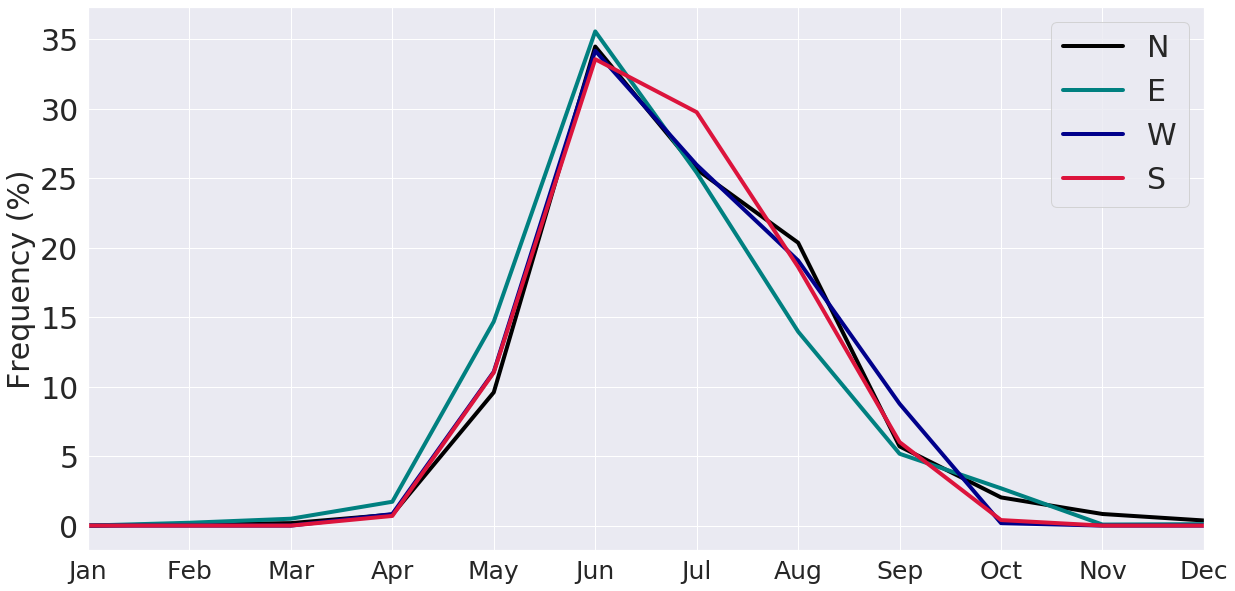

In [247]:
seasonal_precip = get_seasonal_cycle(tracksN)
seasonal_tbb_rain= get_seasonal_cycle(tracksE)
seasonal_tbb_cold= get_seasonal_cycle(tracksW)
seasonal_tbb= get_seasonal_cycle(tracksS)


import seaborn as sns 
sns.set()


plt.figure(figsize=(20,10))

plt.plot(seasonal_precip/np.nansum(seasonal_precip)*100, label = 'N', color= 'black', linewidth= 4.0)
plt.plot(seasonal_tbb_rain/ np.nansum(seasonal_tbb_rain)*100, label = 'E', color= 'teal', linestyle='-', linewidth= 4.0)
plt.plot(seasonal_tbb_cold/ np.nansum(seasonal_tbb_cold)*100, label = 'W', color= 'darkblue',  linewidth= 4.0)
plt.plot(seasonal_tbb/ np.nansum(seasonal_tbb)*100, label = 'S', color= 'crimson', linewidth= 4.0)


plt.legend(fontsize= 30)

plt.xticks(np.arange(0,12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'], fontsize = 25)
plt.yticks(np.linspace(0,35, 8), fontsize = 30 )
plt.xlim(0,11)
plt.ylabel('Frequency (%)', fontsize = 30)
plt.savefig('/media/juli/Data/projects/mcs_tracking/CTT/analysis/seasonal_cycle_directions_tp.png')
plt.show()

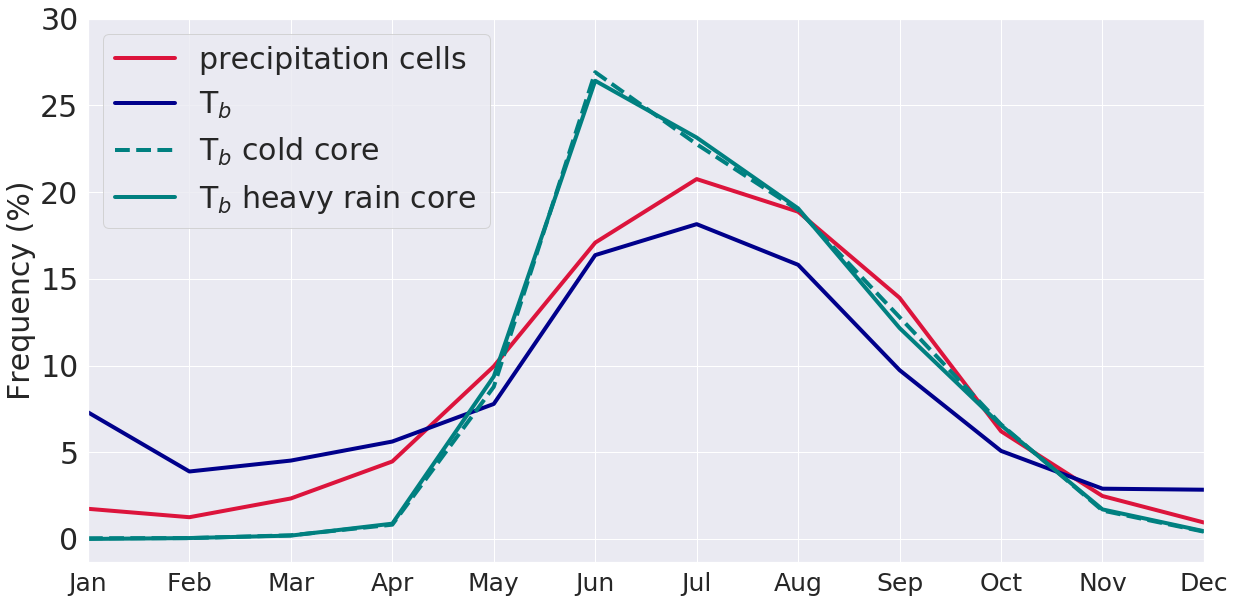

In [460]:
seasonal_precip = get_seasonal_cycle(preciptracks)
seasonal_tbb_rain= get_seasonal_cycle(tbbtracks)
seasonal_tbb_cold= get_seasonal_cycle(tbbcold)
seasonal_tbb= get_seasonal_cycle(tbb)


import seaborn as sns 
sns.set()


plt.figure(figsize=(20,10))

plt.plot(seasonal_precip/np.nansum(seasonal_precip)*100, label = 'precipitation cells', color= 'crimson', linewidth= 4.0)
plt.plot(seasonal_tbb/ np.nansum(seasonal_tbb)*100, label = 'T$_b$', color= 'darkblue', linewidth= 4.0)
plt.plot(seasonal_tbb_cold/ np.nansum(seasonal_tbb_cold)*100, label = 'T$_b$ cold core', color= 'teal', linestyle='--', linewidth= 4.0)

plt.plot(seasonal_tbb_rain/ np.nansum(seasonal_tbb_rain)*100, label = 'T$_b$ heavy rain core ', color= 'teal', linewidth= 4.0)

plt.legend(fontsize= 30)

plt.xticks(np.arange(0,12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'], fontsize = 25)
plt.yticks(np.linspace(0,30, 7), fontsize = 30 )
plt.xlim(0,11)
plt.ylabel('Frequency (%)', fontsize = 30)
plt.savefig('/media/juli/Data/projects/mcs_tracking/CTT/analysis/seasonal_cycle_trackingmethods_domain.png')
plt.show()

##  lifetime histogram 

In [371]:
def get_lifetime(tracks):
    lt= []
    for y in np.arange(2000,2020):
        ytracks = tracks[tracks.timestr.dt.year== y]
        for cell in np.unique(ytracks.cell.values):
            hours= ytracks[ytracks.cell== cell].shape[0] * 0.5
            lt.append(hours)
    lt = np.array(lt)
    lt= np.histogram(lt, bins= np.arange(6,49)[::2]) 
    print('lifetime histo calculated.')
    return lt

## Comparison of geometry features (orientation and aspect)

- choose 50 systems with most of convective rain in each group 
- take also the Tibetan plateau init group 
- show aspect and orientation histograms 

In [794]:
tracks = tracks_n

for c in np.unique(tracks.cell.values):
    y=  tracks[tracks.cell == c].time.dt.year.values[0]
    tp= tp.append(tbbtracks[(tbbtracks.cell == c ) & (tbbtracks.time.dt.year ==y) ])
    

In [807]:
# extract with most convective precipitation for all subgroups (90th percentile)
# and lowest impact cells (p10)
def get_largest(tracks):
    convectives= pd.DataFrame(columns = tracks.columns)
    for y in np.arange(2000,2020):
        ycells = tracks[tracks.time.dt.year == y]
        cells= ycells.groupby('cell').sum()
        cells['y'] = y 
        convectives= convectives.append(cells)
    # choose 50 largest 
    conv= pd.DataFrame(columns = tracks.columns)
    low= pd.DataFrame(columns = tracks.columns)
    supercell = convectives.sort_values('convective_precip', ascending= False)
    supercell_nonan = supercell[supercell.maj_ax > 0]
    p90 = np.percentile(convectives.convective_precip.values, 90)
    supercells = supercell[supercell.convective_precip >= p90]
    print(np.unique(supercells.index.values.shape))
    for c in np.unique(supercells.index.values):
        y = supercells[supercells.index == c].y.values[0]
        cell = tbbtracks[(tbbtracks.cell == c) & (tbbtracks.time.dt.year ==y)]
        conv = conv.append(cell)
    return conv

In [396]:
conv_e = get_largest(tracks_e)
conv_E= get_largest(tracks_E)
conv_N = get_largest(tracks_N)
conv_n = get_largest(tracks_n)

In [539]:
low= get_largest(tbbtracks)

[10244]


KeyboardInterrupt: 

In [547]:
def get_features(tracks):
    orient= []
    aspect= []
    for y in np.arange(2000,2020):
        ytracks = tracks[tracks.time.dt.year== y]
        for cell in np.unique(ytracks.cell.values):
            o= np.nanmean(ytracks[ytracks.cell== cell].orient.values)
            a = np.nanmean(ytracks[ytracks.cell== cell].maj_ax.values) / np.nanmean(ytracks[ytracks.cell== cell].min_ax.values)
            orient.append(o)
            aspect.append(a)
    orient= np.array(orient) 
    aspect = np.array(aspect)
    print('features extracted.')
    orient = orient[np.logical_not(np.isnan(orient))]
    aspect = aspect[np.logical_not(np.isnan(aspect))]
    o= np.histogram(orient, bins = np.linspace(-1.1,1.1,12))
    a = np.histogram(aspect, bins =np.linspace(1,3,11))   
    print('histogram calculated. ')
    return o, a 

In [451]:
import warnings
warnings.filterwarnings('ignore')

orient_e, aspect_e = get_features(conv_e)
orient_E, aspect_E = get_features(conv_E)
orient_n, aspect_n = get_features(conv_n)
orient_N, aspect_N = get_features(conv_N)
orient_tp, aspect_tp = get_features(conv_tp)

features extracted.
histogram calculated. 
features extracted.
histogram calculated. 
features extracted.
histogram calculated. 
features extracted.
histogram calculated. 
features extracted.
histogram calculated. 


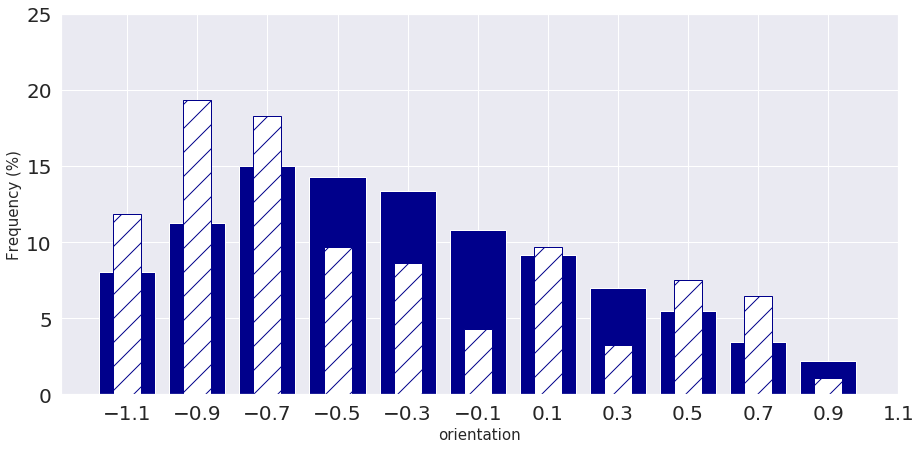

In [541]:
import seaborn as sns 
sns.set()
plt.figure(figsize=(15,7))

bins = orient[1]

plt.bar(bins[:-1] , o[0]/ np.nansum(o[0])*100, label='all', width = 0.16, color= 'darkblue')
plt.bar(bins[:-1] , o_95[0]/ np.nansum(o_95[0])*100, label=' 95$^{th}$', width = 0.08, hatch ='/', edgecolor= 'darkblue', color = 'white')



plt.xticks(bins[:], fontsize = 20)
plt.yticks(np.linspace(0,25,6), fontsize = 20)

plt.xlabel('orientation', fontsize= 15)
plt.ylabel('Frequency (%)', fontsize= 15)
plt.show()

In [548]:
o_h, aspect_h= get_features(conv)
o, aspect = get_features(tbbtracks)

features extracted.
histogram calculated. 
features extracted.
histogram calculated. 


In [600]:
#o_tp, aspect_tp= get_features(conv_tp)
o_sr, aspect_sr= get_features(surrounding)

features extracted.
histogram calculated. 


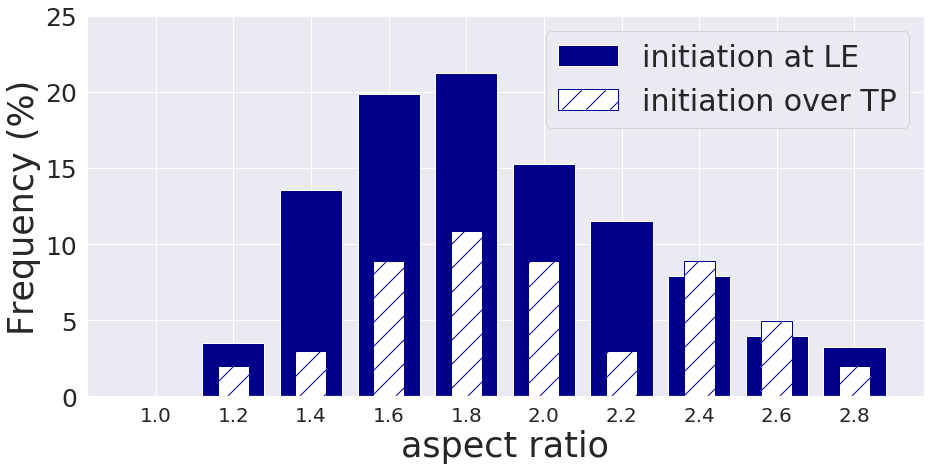

In [603]:
sns.set()

plt.figure(figsize=(15,7))

bins = aspect_h[1]

plt.bar(bins[:-1] , aspect_sr[0]/ np.nansum(aspect_sr[0])*100, label='initiation at LE', width = 0.16, color= 'darkblue')
plt.bar(bins[:-1] , aspect_tp[0]/ np.nansum(aspect_h[0])*100, label= 'initiation over TP' , width = 0.08, hatch ='/', edgecolor= 'darkblue', color = 'white')

#plt.bar(bins[:-1] , aspect_95[0]/ np.nansum(aspect_95[0])*100, label=' 95$^{th}$', width = 0.08, hatch ='/', edgecolor= 'darkblue', color = 'white')


#plt.bar(bins[:-1] , aspect_N[0]/ np.nansum(aspect_N[0])*100, label= 'LE north', width=0.1,color= 'teal')
#plt.bar(bins[:-1] , aspect_E[0]/ np.nansum(aspect_E[0])*100, label = 'LE east', width = 0.08, hatch= '/' , edgecolor = 'teal', color= 'white')
#plt.bar(bins[:-1] , aspect_n[0]/ np.nansum(aspect_n[0])*100, label= 'TP north', width= 0.05, color= 'crimson')
#plt.bar(bins[:-1] , aspect_e[0]/ np.nansum(aspect_e[0])*100, label=' TP east', width = 0.02, color= 'darkblue')

#plt.step(bins[:-1] , aspect_e[0]/ np.nansum(aspect_e[0])*100, label=' TP', linewidth = 2, color= 'crimson')

plt.xticks(bins[:-1], fontsize= 20)
plt.yticks(np.arange(0,30)[::5], fontsize= 25)
plt.legend(fontsize=30 )
plt.xlabel('aspect ratio', fontsize= 35)
plt.ylabel('Frequency (%)', fontsize= 35)

plt.savefig('plots/aspect_tp_surrounding.png')
plt.show()



## remove all short-lived precipitation cells to compare lifetime histograms

In [386]:
def get_lifetime(tracks):
    lt= []
    for y in np.arange(2000,2020):
        ytracks = tracks[tracks.timestr.dt.year== y]
        for cell in np.unique(ytracks.cell.values):
            hours= ytracks[ytracks.cell== cell].shape[0] * 0.5
            if hours >=6:
                lt.append(hours)
    lt = np.array(lt)
    lt= np.histogram(lt, bins=np.arange(6,49)[::2] ) 
    print('lifetime histo calculated.')
    return lt

lt_precip= get_lifetime(preciptracks)

lifetime histo calculated.


In [385]:
#lt_precip= get_lifetime(preciptracks)
lt_tbb_rain= get_lifetime(tbbtracks)
lt_tbb_cold= get_lifetime(tbbcold)
lt_tbb= get_lifetime(tbb)

lifetime histo calculated.
lifetime histo calculated.
lifetime histo calculated.


In [615]:
lt_tbb_rain= get_lifetime(tracks_N)
lt_tbb_cold= get_lifetime(tracks_E)
lt_tbb= get_lifetime(tracks_n)
lt_precip= get_lifetime(tracks_e)

lifetime histo calculated.
lifetime histo calculated.
lifetime histo calculated.
lifetime histo calculated.


## Check out lifetime diagram for different time periods! 

2010 - 2018 gives a different lifetime distribution -> evidence strengthening of monsoon ?

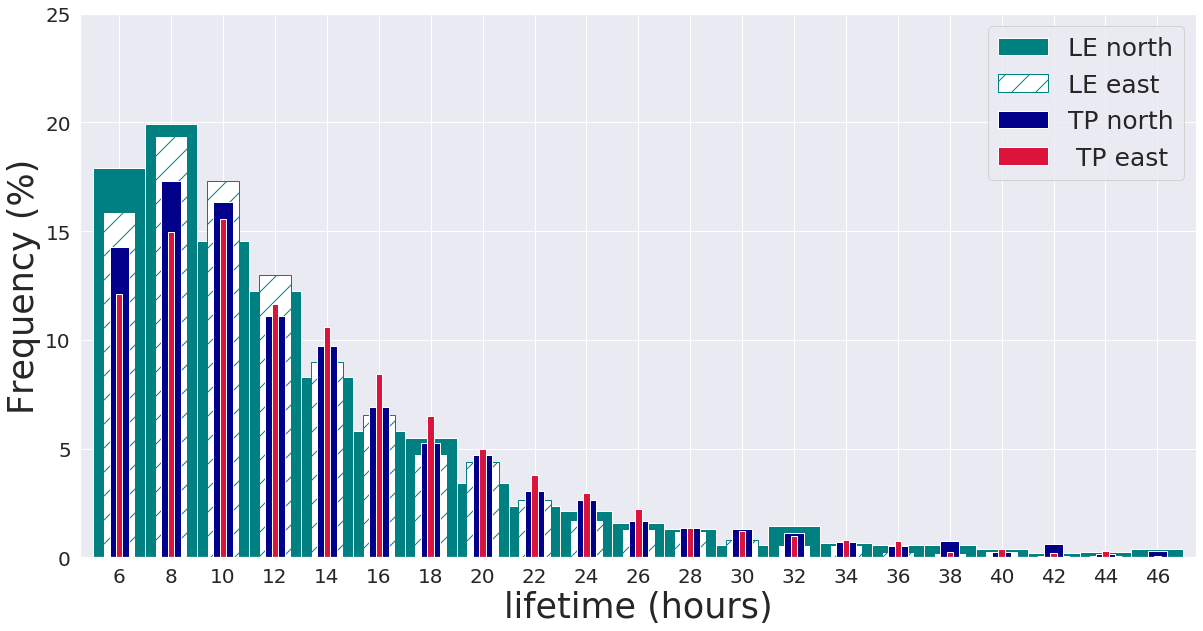

In [623]:
bins = lt_precip[1]
import matplotlib.pyplot as plt

import seaborn as sns 
sns.set()

plt.figure(figsize=(20,10))

plt.bar(bins[:-1] , lt_tbb_rain[0]/ np.nansum(lt_tbb_rain[0])*100, label= 'LE north', width=0.8*2.5,color= 'teal')
plt.bar(bins[:-1] , lt_tbb_cold[0]/ np.nansum(lt_tbb_cold[0])*100, label = 'LE east', width = 0.5*2.5,hatch= '/', edgecolor= 'teal', color= 'white')
plt.bar(bins[:-1] , lt_tbb[0]/ np.nansum(lt_tbb[0])*100, label= 'TP north', width= 0.3*2.5, color= 'darkblue')
plt.bar(bins[:-1] , lt_precip[0]/ np.nansum(lt_precip[0])*100, label=' TP east', width = 0.1*2.5, color= 'crimson')

plt.legend(fontsize= 25)

plt.xticks(bins[:], fontsize = 20)
plt.yticks(np.linspace(0,25,6), fontsize = 20)
plt.xlim(4.5, 47.5)
plt.xlabel('lifetime (hours)', fontsize= 35)
plt.ylabel('Frequency (%)', fontsize= 35)

plt.savefig('/media/juli/Data/projects/mcs_tracking/CTT/analysis/lifetime_mcstypes_2000-2019.png')
plt.show()

## Area distribution 

In [633]:
def get_area(tracks):
    a= []
    for cell in np.unique(tracks.cell.values):
        area= np.nanmean(tracks[tracks.cell== cell].ncells.values)
        a.append(area)
    a = np.array(a)
    a = np.histogram(a, bins=(50, 100,150, 200, 300, 400, 500, 750, 1000, 1250, 1500 , 1750,2000, 2500, 3000, 3500, 4000, 4500, 5000))
    print('area histo calculated.')
    return a

In [406]:
a_precip= get_area(preciptracks)
a_tbb_rain= get_area(tbbtracks)
a_tbb_cold= get_area(tbbcold)
a_tbb= get_area(tbb)

area histo calculated.
area histo calculated.
area histo calculated.
area histo calculated.


In [674]:
def get_area(tracks):
    a= []
    for cell in np.unique(tracks.cell.values):
        area= np.mean(tracks[tracks.cell== cell].ncells.values)
        a.append(area)
    a = np.array(a)
    a = np.histogram(a, bins=(250,500, 750, 1000, 1250, 1500 ,1750, 2000, 2250,2500,2750, 3000, 3250,3500, 4000))
    print('area histo calculated.')
    return a

In [675]:
a_precip= get_area(tracks_N)
a_tbb_rain= get_area(tracks_E)
a_tbb_cold= get_area(tracks_n)
a_tbb= get_area(tracks_e)

area histo calculated.
area histo calculated.
area histo calculated.
area histo calculated.


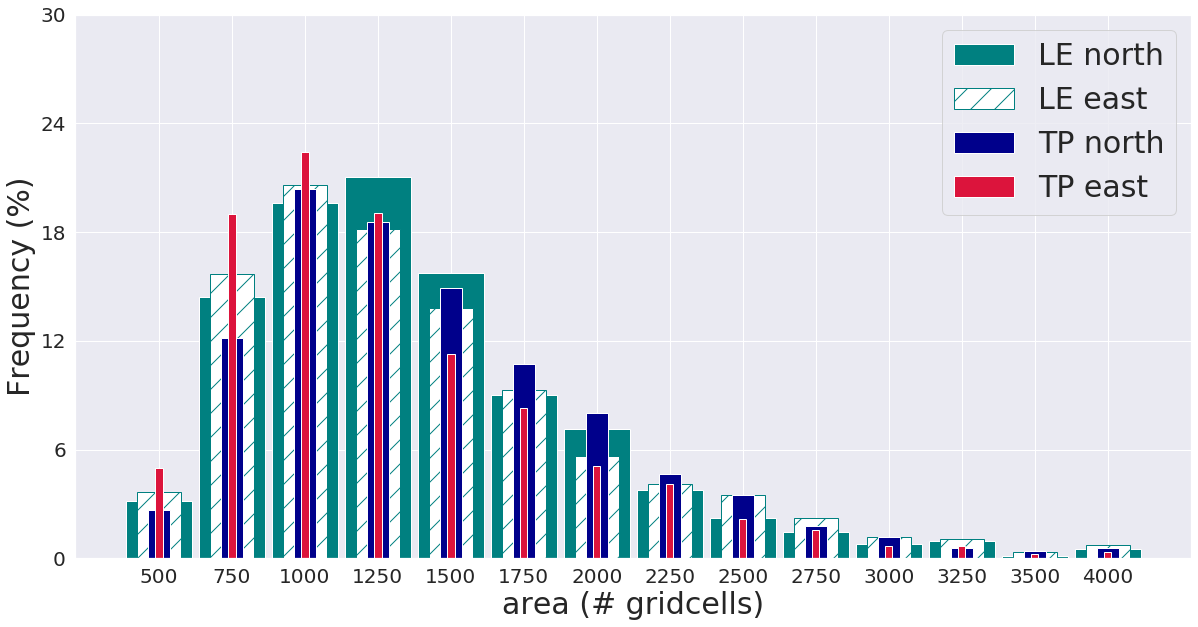

In [678]:
bins = a_tbb[1]
plt.figure(figsize=(20,10))

ticks =np.arange(14)


plt.bar(ticks, a_tbb_rain[0]/ np.nansum(a_tbb_rain[0]) * 100 , label= 'LE north', width=0.9,color= 'teal')
plt.bar(ticks , a_tbb_cold[0]/ np.nansum(a_tbb_cold[0]) * 100 , label = 'LE east', width = 0.6  ,hatch= '/', edgecolor= 'teal', color= 'white')
plt.bar(ticks , a_tbb[0]/ np.nansum(a_tbb[0]) * 100 , label= 'TP north', width= 0.3 , color= 'darkblue')
plt.bar(ticks , a_precip[0]/ np.nansum(a_precip[0]) * 100 , label='TP east', width = 0.1, color= 'crimson')

plt.legend(fontsize= 30)

plt.xticks(ticks , bins[1:], fontsize = 20)
plt.yticks(np.linspace(0,30,6), fontsize= 20 )

plt.xlabel('area (# gridcells)', fontsize= 30)
plt.ylabel('Frequency (%)', fontsize= 30)
plt.savefig('/media/juli/Data/projects/mcs_tracking/CTT/analysis/area_mcsclasses.png')
plt.show()

## Propagation speed 

In [595]:
# calculate propagation speed (tobac can be used)
import tobac
tracks= tobac.calculate_velocity(tbb, method_distance=None)


## Propagation speed histogram 

In [750]:
def get_v(tracks):
    v= []
    for cell in np.unique(tracks.cell.values):
        ps = np.nanmean(tracks[tracks.cell== cell].v.values)
        v.append(ps)
    v = np.array(v)
    v = np.histogram(v, bins=np.arange(6,31)[::2]) 
    print('propagation speed histo calculated.')
    return v

In [751]:
N= get_v(tracks_N)
E= get_v(tracks_E)
n= get_v(tracks_n)
e= get_v(tracks_e)

propagation speed histo calculated.
propagation speed histo calculated.
propagation speed histo calculated.
propagation speed histo calculated.


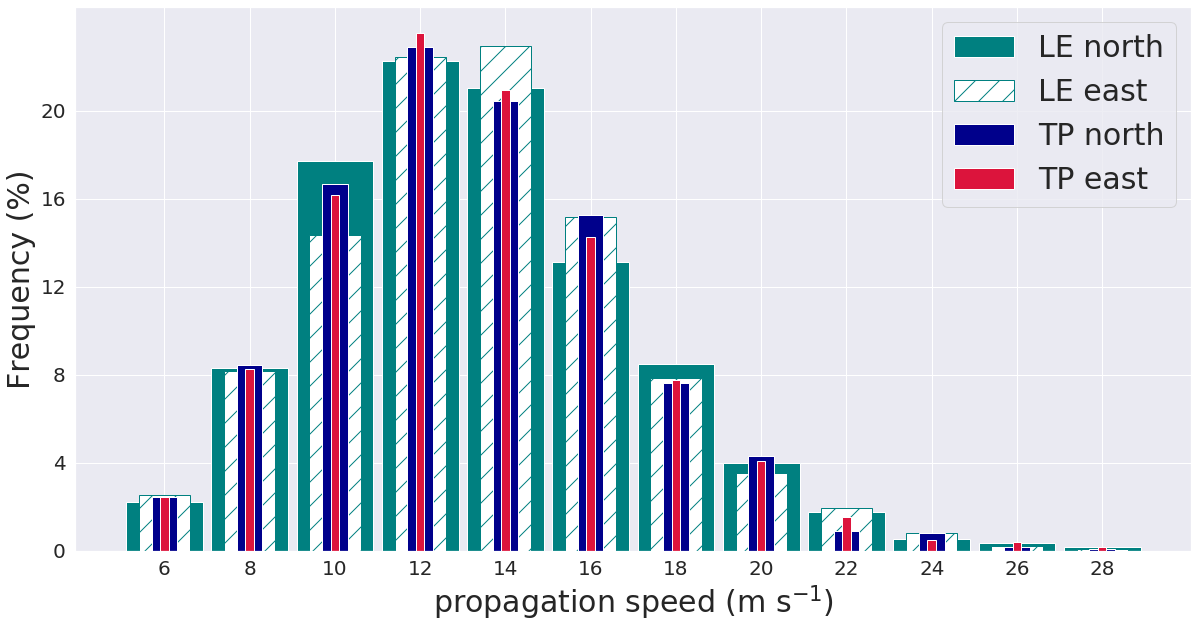

In [756]:
# plot 

bins = N[1]
plt.figure(figsize=(20,10))

ticks =np.arange(bins.shape[0]- 1)

plt.bar(ticks, N[0]/ np.nansum(N[0]) * 100 , label= 'LE north', width=0.9,color= 'teal')
plt.bar(ticks , E[0]/ np.nansum(E[0]) * 100 , label = 'LE east', width = 0.6  ,hatch= '/', edgecolor= 'teal', color= 'white')
plt.bar(ticks , n[0]/ np.nansum(n[0]) * 100 , label= 'TP north', width= 0.3 , color= 'darkblue')
plt.bar(ticks , e[0]/ np.nansum(e[0]) * 100 , label='TP east', width = 0.1, color= 'crimson')

plt.legend(fontsize= 30)

plt.xticks(ticks , bins[::], fontsize = 20)
plt.yticks(np.linspace(0,20,6), fontsize= 20 )

plt.xlabel('propagation speed (m s$^{-1}$)', fontsize= 30)
plt.ylabel('Frequency (%)', fontsize= 30)
plt.savefig('/media/juli/Data/projects/mcs_tracking/CTT/analysis/propagationspeed_mcsclasses.png')
plt.show()




# Classification of convective cells 

1. TP, east 
2. TP, TP north 
3. surrounding, east
4. surrounding, north 





In [164]:
# divide into north-moving, east-moving and other 

def propagation_dir(tracks):
    pd.options.mode.chained_assignment = None 
    
    tracks['dir'] = 0 
    for c in np.unique(tracks.cell.values):
        cell= tracks[tracks.cell == c]

        west_east= cell.longitude.values[-1] - cell.longitude.values[0]
        north_south = cell.latitude.values[-1] - cell.latitude.values[0]

        if north_south > west_east:
            if np.nanmean(cell.latitude.values[0:2]) < np.nanmean(cell.latitude.values[-3:-1]):
                tracks['dir'][tracks.cell == c] =  'N'
            elif np.nanmean(cell.latitude.values[0:2]) > np.nanmean(cell.latitude.values[-3:-1]):
                tracks['dir'][tracks.cell == c] =  'S'
                
        elif north_south < west_east:
            if np.nanmean(cell.longitude.values[0:2]) < np.nanmean(cell.longitude.values[-3:-1]):
                tracks['dir'][tracks.cell == c] =  'E'
            elif np.nanmean(cell.longitude.values[0:2]) > np.nanmean(cell.longitude.values[-3:-1]):
                tracks['dir'][tracks.cell == c] =  'W'
    return tracks 

In [165]:
tracks = propagation_dir(tbbtracks)
tracks.to_hdf('tbbtracks_geometry.h5', 'table')

In [234]:
#  separate tracks based on propagation direction, thresholds for intensity, and TP domain vs. surrounding 
track_sr= propagation_dir(surrounding_tracks)
track_tp = propagation_dir(tp_tracks)

tbb = tp_tracks
print(tbb[tbb.dir=='N'].shape,tbb[tbb.dir=='E'].shape, tbb[tbb.dir=='W'].shape, tbb[tbb.dir=='S'].shape)
tbb = surrounding_tracks
print(tbb[tbb.dir=='N'].shape,tbb[tbb.dir=='E'].shape, tbb[tbb.dir=='W'].shape, tbb[tbb.dir=='S'].shape)

(40655, 20) (58208, 20) (15338, 20) (27789, 20)
(56969, 20) (46853, 20) (13656, 20) (35002, 20)


## select all northern and eastern moving cells 

In [180]:
tracks_e= pd.DataFrame(columns = track_tp.columns)
tracks_n= pd.DataFrame(columns = track_tp.columns)

for y in np.unique(track_tp.timestr.dt.year):
    subset = track_tp[track_tp.timestr.dt.year == y]
    for i in np.unique(subset.cell.values):
        cell = subset[subset.cell == i]
        if cell.dir.values[0] == 'E':
            tracks_e= tracks_e.append(cell)
        if cell.dir.values[0] == 'N':
            tracks_n= tracks_n.append(cell)

In [181]:
track_sr = surrounding_tracks 
tracks_E= pd.DataFrame(columns = track_sr.columns)
tracks_N= pd.DataFrame(columns = track_sr.columns)

for y in np.unique(track_sr.timestr.dt.year):
    subset = track_sr[track_sr.timestr.dt.year == y]
    for i in np.unique(subset.cell.values):
        cell = subset[subset.cell == i]
        if cell.dir.values[0] == 'E':
            tracks_E= tracks_E.append(cell)
        if cell.dir.values[0] == 'N':
            tracks_N= tracks_N.append(cell)

## save all four types

In [182]:
tracks_e.to_hdf('/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/Tracks_tp_e.h5','table')
tracks_n.to_hdf('/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/Tracks_tp_n.h5','table')

tracks_E.to_hdf('/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/Tracks_sr_e.h5','table')
tracks_N.to_hdf('/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/Tracks_sr_n.h5','table')


## get for direction and location types of MCS 

In [161]:
tracks_e = pd.read_hdf('/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/Tracks_tp_e.h5','table')
tracks_n= pd.read_hdf('/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/Tracks_tp_n.h5','table')
tracks_E= pd.read_hdf('/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/Tracks_sr_e.h5','table')
tracks_N =pd.read_hdf('/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/Tracks_sr_n.h5','table')


In [163]:
print(tracks_e.shape)
print(tracks_n.shape)
print(tracks_E.shape)
print(tracks_N.shape)

(58208, 20)
(40655, 20)
(46853, 20)
(56969, 20)


## Density plots 

- maybe just indicate locations with dot in for different colors 
- different sizes for initiation and dissipation 

In [757]:
# density plot of spatial distribution 
# density intitiation vs. dissipation 

In [114]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [133]:
def track_density(tracks, elevations):
    # empty mask for TP region 
    track_count = np.zeros((600,350))
    for idx in np.arange(tracks.shape[0]):
        # get coords 
        lat = tracks.latitude.values[idx]
        lon = tracks.longitude.values[idx]
        # get closest coordinate 
        lo = find_nearest(elevations.lon.values, lon)
        la = find_nearest(elevations.lat.values, lat)
        # get corresponding indices 
        x = np.where(elevations.lon == lo)[0]
        y = np.where(elevations.lat == la)[0]
        # count at coordinate location 
        track_count[x,y] += 1
    return track_count
        

In [134]:
track_count_e  = track_density(tracks_e, elevations)
track_count_n  = track_density(tracks_n, elevations)
track_count_E  = track_density(tracks_E, elevations)
track_count_N  = track_density(tracks_N, elevations)

In [10]:
track_count_e = np.fromfile('track_count_e.npy')
track_count_n = np.fromfile('track_count_n.npy')
track_count_E = np.fromfile('track_count_E.npy')
track_count_N= np.fromfile('track_count_N.npy')

In [920]:
## Import elevation file for 3000 m boundary 
import xarray
dem = '/media/juli/Data/projects/data/elevation/elevation_600x350.nc'
elevations = xarray.open_dataarray(dem)
lon = elevations.lon.values
lat= elevations.lat.values

In [150]:
track_count = np.resize(track_count_N, (600,350))

## select coordinates for initiation and dissipation 

In [196]:
def get_init(tracks):
    init_lats= []
    init_lons= []
    diss_lats= []
    diss_lons= []
    for cell in np.unique(tracks.cell.values):
        subset= tracks[tracks.cell == cell]
        init_lats.append(subset.latitude.values[0])
        init_lons.append(subset.longitude.values[0])
        diss_lats.append(subset.latitude.values[-1])
        diss_lons.append(subset.longitude.values[-1])
    return np.array(init_lats), np.array(init_lons), np.array(diss_lats), np.array(diss_lons)

In [197]:
init_lats_e, init_lons_e, diss_lats_e, diss_lons_e = get_init(tracks_e)
init_lats_n, init_lons_n , diss_lats_n, diss_lons_n = get_init(tracks_n)

In [216]:
init_lats_E, init_lons_E, diss_lats_E, diss_lons_E = get_init(tracks_E)
init_lats_N, init_lons_N , diss_lats_N, diss_lons_N = get_init(tracks_N)

In [266]:
tpcells

74

In [261]:
tpcells= 0 
for cell in np.unique(tp_tracks.cell.values):
    subset = tp_tracks[tp_tracks.cell == cell]
    if 0 not in subset.tp_flag.values:
        tpcells+= 1 

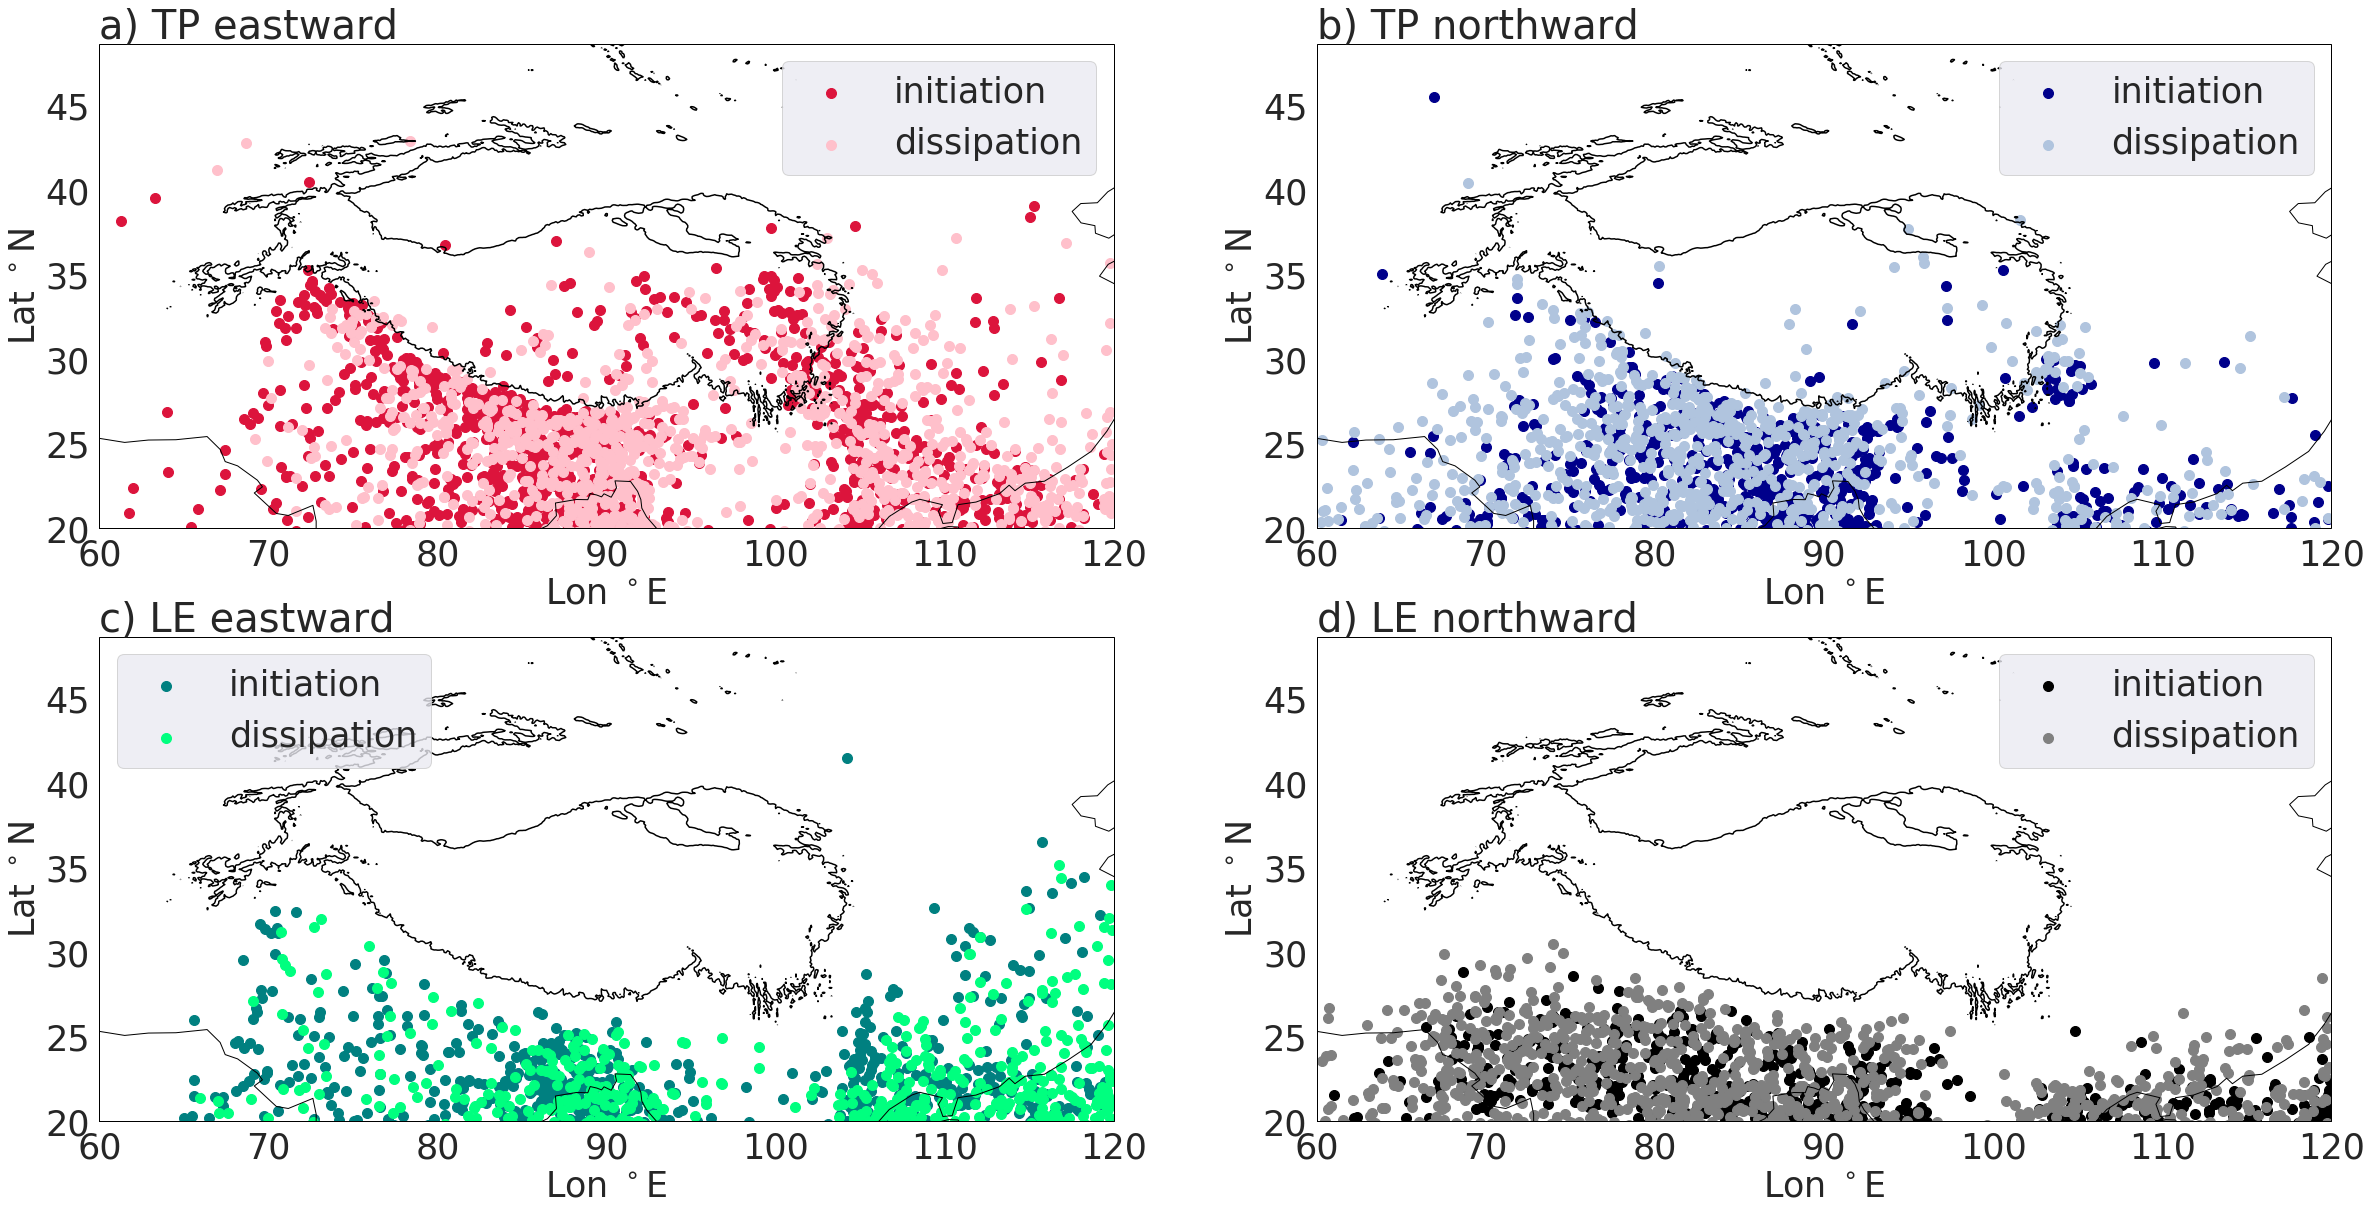

In [1731]:
## track density plot 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors

plt.figure(figsize=(40,20))
xlabels=[60,70,80,90,100,110,120]
ylabels= [20,30,40]
# markersize 
s = 100



# Tracks TP eastwards 
ax1 = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax1.set_extent([np.nanmin(elevations.lon.values),np.nanmax(elevations.lon.values),20,45])
ax1.scatter(init_lons_e, init_lats_e,  color='crimson',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax1.scatter(diss_lons_e, diss_lats_e,  color='pink',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'dissipation')
ax1.coastlines()
# 3000 m boundary 
ax1.contour(lon,lat, elevations.data.T, [3000], cmap = 'Greys_r')
# axis labels 
ax1.legend(fontsize= 35)
ax1.set_xticks(xlabels, xlabels)
ax1.set_yticks(ylabels,ylabels)
ax1.set_xlabel('Lon $^\circ$E',  fontsize=35)
ax1.set_ylabel('Lat $^\circ$N',  fontsize=35)
ax1.set_title('a) TP eastward', fontsize = 40, loc ='left')


# Tracks TP northward 
ax2 = plt.subplot(2, 2, 2 , projection=ccrs.PlateCarree())
ax2.set_extent([np.nanmin(elevations.lon.values),np.nanmax(elevations.lon.values),20,45])
ax2.scatter(init_lons_n, init_lats_n, color='darkblue',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax2.scatter(diss_lons_n, diss_lats_n, color='lightsteelblue',marker='o', s =s, transform=ccrs.PlateCarree(),label = 'dissipation')

ax2.coastlines()
# 3000 m boundary 
ax2.contour(lon,lat, elevations.data.T, [3000], cmap = 'Greys_r')
# axis labels 
ax2.legend(fontsize= 35)
ax2.set_xticks(xlabels, xlabels)
ax2.set_yticks(ylabels,ylabels)
ax2.set_xlabel('Lon $^\circ$E',  fontsize=35)
ax2.set_ylabel('Lat $^\circ$N',  fontsize=35)
ax2.set_title('b) TP northward', fontsize = 40, loc ='left')

# Tracks eastwards 
ax3 = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax3.set_extent([np.nanmin(elevations.lon.values),np.nanmax(elevations.lon.values),20,45])
ax3.scatter(init_lons_E, init_lats_E,  color='teal',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax3.scatter(diss_lons_E, diss_lats_E,  color='springgreen',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'dissipation')
ax3.coastlines()
# 3000 m boundary 
ax3.contour(lon,lat, elevations.data.T, [3000], cmap = 'Greys_r')
# axis labels 
ax3.legend(fontsize= 35)
ax3.set_xticks(xlabels, xlabels)
ax3.set_yticks(ylabels,ylabels)
ax3.set_xlabel('Lon $^\circ$E',  fontsize=35)
ax3.set_ylabel('Lat $^\circ$N',  fontsize=35)
ax3.set_title('c) LE eastward', fontsize = 40, loc ='left')

# Tracks  northward 
ax4 = plt.subplot(2, 2, 4 , projection=ccrs.PlateCarree())
ax4.set_extent([np.nanmin(elevations.lon.values),np.nanmax(elevations.lon.values),20,45])
ax4.scatter(init_lons_N, init_lats_N, color='black',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax4.scatter(diss_lons_N, diss_lats_N, color='grey',marker='o', s = s, transform=ccrs.PlateCarree(),label = 'dissipation')


ax4.coastlines()
# 3000 m boundary 
ax4.contour(lon,lat, elevations.data.T, [3000], cmap = 'Greys_r')
# axis labels 
ax4.legend(fontsize= 35)
ax4.set_xticks(xlabels, xlabels)
ax4.set_yticks(ylabels,ylabels)
ax4.set_xlabel('Lon $^\circ$E',  fontsize=35)
ax4.set_ylabel('Lat $^\circ$N',  fontsize=35)
ax4.set_title('d) LE northward', fontsize = 40, loc ='left')


plt.rc('xtick', labelsize=35) 
plt.rc('ytick', labelsize=35) 
plt.savefig('plots/track_densities.png')
plt.show()


In [2]:
# get file with calculated precipitation contributions 
contributions = pd.read_csv('/media/juli/Data/projects/mcs_tracking/GPM_IMERG/contributions_precip_2000_2019.csv')
contributions

,Unnamed: 0,year,month,tp_precip,le_precip,tp_precip_mcs,le_precip_mcs,convective_tp,convective_le,convective_tp_mcs,convective_le_mcs
0,0,2000.0,6.0,4.292544e+06,3.564066e+07,1.341037e+06,1.693210e+07,1.128731e+06,1.571910e+07,456100.593823,9.948918e+06
1,1,2000.0,7.0,5.040464e+06,3.920859e+07,2.149922e+06,1.975116e+07,1.037864e+06,1.742344e+07,585121.696517,1.145568e+07
2,2,2000.0,8.0,4.721198e+06,3.755240e+07,2.000507e+06,1.705664e+07,9.300987e+05,1.546174e+07,522289.949192,9.526555e+06
3,3,2000.0,9.0,3.051570e+06,2.366995e+07,6.113400e+05,9.434722e+06,5.575467e+05,9.917984e+06,151589.167356,5.605318e+06
4,4,2000.0,10.0,8.699404e+05,1.682209e+07,1.276225e+05,4.941417e+06,8.845638e+04,5.593549e+06,18159.850041,2.753784e+06
5,5,2000.0,11.0,4.482205e+05,4.905136e+06,8.420129e+04,7.019364e+05,4.088521e+04,9.373527e+05,5277.820299,1.335395e+05
6,6,2000.0,12.0,3.095139e+05,3.953009e+06,6.461881e+04,8.698039e+05,1.097546e+04,4.844871e+05,1053.873078,1.223768e+05
7,7,2001.0,1.0,3.582418e+05,4.593689e+06,3.139848e+04,6.270611e+05,5.170575e+04,1.111193e+06,2236.657339,6.789541e+04
8,8,2001.0,2.0,2.980924e+05,4.156856e+06,6.810329e+04,4.766144e+05,4.547073e+04,1.122827e+06,6984.342075,1.087341e+05
9,9,2001.0,3.0,5.951359e+05,6.919209e+06,3.166768e+05,2.459291e+06,1.284009e+05,1.843316e+06,70901.984518,8.705883e+05


## Geometry of cloud systems 

In [1238]:
# get file with calculated precipitation contributions 
shapes = pd.read_hdf('/media/juli/Data/projects/data/satellite_data/ncep/ctt/Save/tbbtracking/Tracks_2003_geometry.h5', 'table')

In [1247]:
shapes.orient.values

array([ 1.06109892,  0.80055078,  1.23004638, ..., -0.66703224,
       -0.77908321, -0.53937236])

In [1241]:
aspect= shapes.min_ax.values/ shapes.maj_ax.values
aspect

/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([0.92096998, 0.98668727, 0.54918056, ..., 0.27447755, 0.43675535,
       0.34687666])

In [1233]:
aspect[aspect > 1].shape[0]/ shapes.shape[0] * 100 
aspect[aspect > 2].shape[0]/ shapes.shape[0] * 100 
aspect[aspect > 3].shape[0]/ shapes.shape[0] * 100 
aspect[aspect > 4].shape[0]/ shapes.shape[0] * 100

/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


4.157519209659714

## Contribution to total precipitation 


In [33]:
# get file with calculated precipitation contributions 
contributions = pd.read_csv('/media/juli/Data/projects/mcs_tracking/GPM_IMERG/contributions_precip_2000_2019.csv')


contributions2 = pd.read_csv('/media/juli/Data/projects/mcs_tracking/GPM_IMERG/contributions_precip_2015_2019.csv')

merged = contributions.merge(contributions2, 'outer')
merged.to_hdf('/media/juli/Data/projects/mcs_tracking/GPM_IMERG/contributions_precip_merged.csv', 'table')

In [4]:
# small scale tracking 
tptracks['month'] = tptracks.time.dt.month.values
monthly_smallscale = tptracks.groupby('month').mean()
monthly_smallscale = monthly_smallscale['convective_precip'].values
monthly_tp = contributions.groupby('month').mean()
monthly_tp = monthly_tp['tp_precip'].values

np.nansum(monthly_smallscale)/ np.nansum(monthly_tp) * 100 

NameError: name 'monthly_smallscale' is not defined

In [34]:
contributions = merged

In [35]:
contr_tp = contributions.tp_precip_mcs.values/ contributions.tp_precip.values* 100 
contr_mcs = contributions.le_precip_mcs.values / contributions.le_precip.values * 100 

contr_convection_tp= contributions.convective_tp_mcs.values/ contributions.convective_tp.values * 100 
contr_convection_le= contributions.convective_le_mcs.values / contributions.convective_le.values * 100

print('contribution of TP MCS to total precip:', np.nanmean(contr_tp)) 
print('TP MCS to convective precip:', np.nanmean(contr_convection_tp))
print('contribution of MCS in surrounding:', np.nanmean(contr_mcs))
print('convective precip in surrounding region', np.nanmean(contr_convection_le))  

contribution of TP MCS to total precip: 30.059552525840473
TP MCS to convective precip: 35.429819664988244
contribution of MCS in surrounding: 35.951255275659065
convective precip in surrounding region 48.102427475794535


In [7]:
contributions['contr_tp'] = contributions.tp_precip_mcs.values / contributions.tp_precip.values * 100
contributions['contr_mcs'] = contributions.le_precip_mcs.values / contributions.le_precip.values * 100
contributions['contr_convective_tp'] = contributions.convective_tp_mcs.values/ contributions.convective_tp.values * 100 
contributions['contr_convective_le'] = contributions.convective_le_mcs.values/contributions.convective_le.values * 100 


In [8]:
# monthly means and standard deviation 
monthly_means = contributions.groupby('month').mean()
std = contributions.groupby('month').std()

## Seasonal variation of precip contributions 

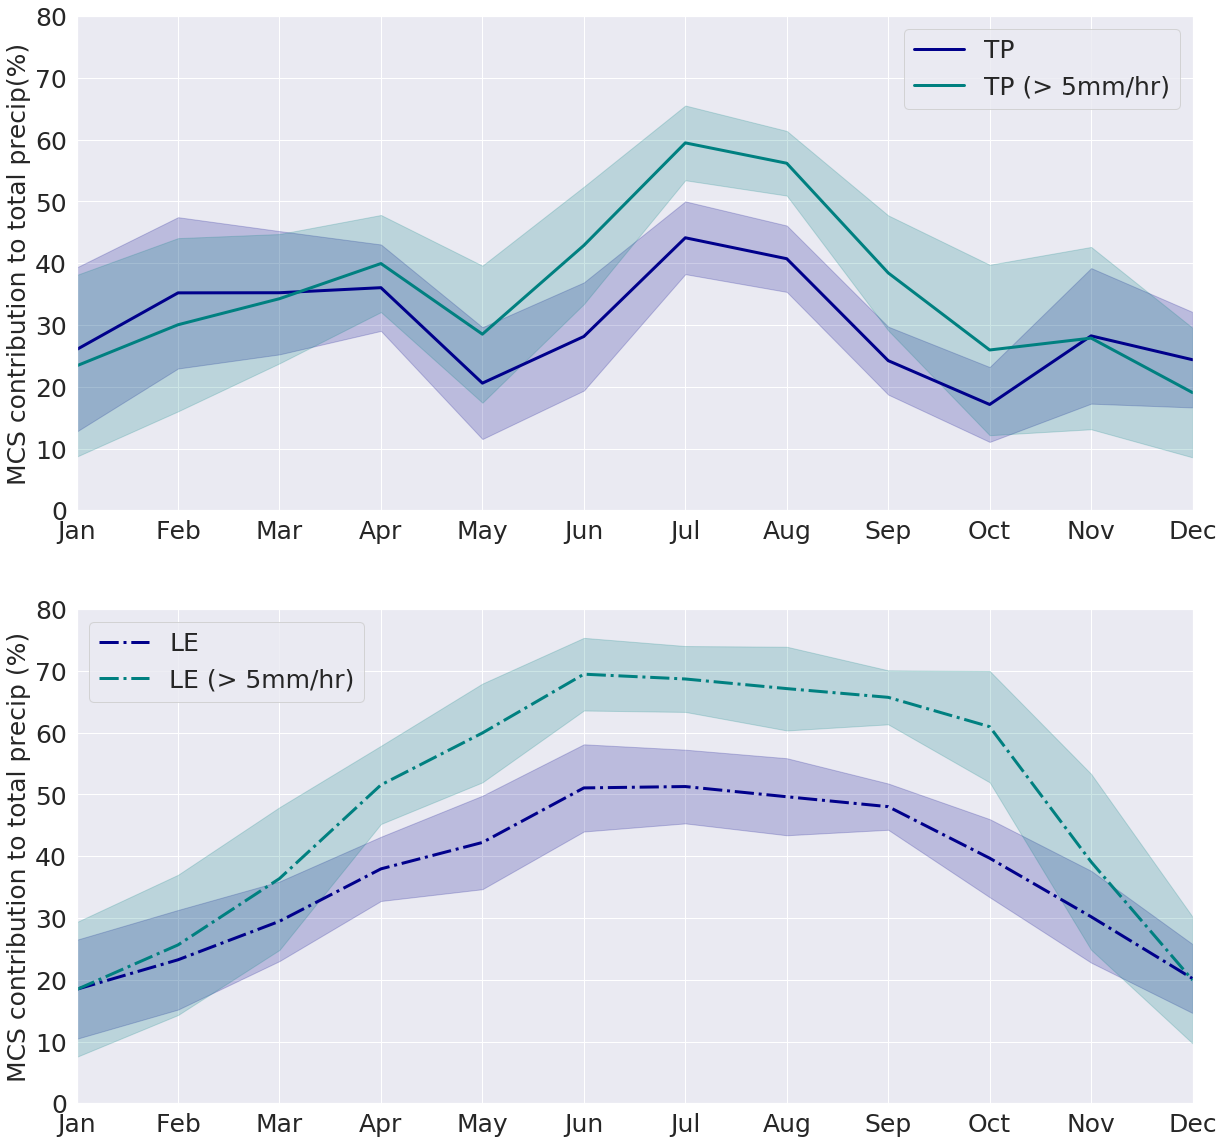

In [36]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(20,20))

lw = 3.0
x = np.arange(0,12)

ax = plt.subplot(2, 1, 1 )
ax.plot(x, monthly_means['contr_tp'].values, label = 'TP', color = 'darkblue',linewidth =lw)
ax.plot(x, monthly_means['contr_convective_tp'].values, label = 'TP (> 5mm/hr)', color = 'teal', linewidth =lw, linestyle = '-')
ax.fill_between(x, monthly_means['contr_tp'].values - std['contr_tp'].values, monthly_means['contr_tp'].values + std['contr_tp'].values, alpha = 0.2, color = 'darkblue')
ax.fill_between(x, monthly_means['contr_convective_tp'].values -  std['contr_convective_tp'].values,  monthly_means['contr_convective_tp'].values +  std['contr_convective_tp'].values, alpha = 0.2, color ='teal')


ax2 = plt.subplot(2, 1, 2)
ax2.plot(x, monthly_means['contr_mcs'].values, label = 'LE', color = 'darkblue',linewidth =lw, linestyle= '-.')
ax2.plot(x, monthly_means['contr_convective_le'].values, label = 'LE (> 5mm/hr)', color = 'teal', linewidth =lw, linestyle = '-.')
ax2.fill_between(x, monthly_means['contr_mcs'].values - std['contr_mcs'].values, monthly_means['contr_mcs'].values + std['contr_mcs'].values, alpha = 0.2, color = 'darkblue')
ax2.fill_between(x, monthly_means['contr_convective_le'].values -  std['contr_convective_le'].values,  monthly_means['contr_convective_le'].values +  std['contr_convective_le'].values, alpha = 0.2, color ='teal')



xlabels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']
ax.legend(fontsize= 25)
ax2.legend(fontsize= 25)
ax.set_xlim(0,11)
ax.set_xticks(np.arange(0,12))
ax.set_xticklabels(xlabels, fontsize= 25)
ax.set_yticks(np.arange(0,90)[::10])
ax.set_yticklabels(np.arange(0,90)[::10], fontsize= 25)
ax.set_ylabel('MCS contribution to total precip(%)', fontsize = 25)



ax2.set_xlim(0,11)
ax2.set_xticks(np.arange(0,12))
ax2.set_yticks(np.arange(0,90)[::10])
ax2.set_xticklabels(xlabels, fontsize= 25)
ax2.set_yticklabels(np.arange(0,90)[::10], fontsize= 25)
ax2.set_ylabel('MCS contribution to total precip (%)', fontsize = 25)

plt.savefig('/media/juli/Data/projects/mcs_tracking/CTT/analysis/plots/seasonalcycle_precip_contributions_2000-2019.png')
plt.show()

In [54]:
# get total precipitation from GPM within TP 3000 m boundary 
tp_precip = '/media/juli/Data/projects/mcs_tracking/CTT/analysis/'

In [42]:
tp_tracks = tbbtracks[tbbtracks.tp_flag > 0]

In [377]:
# calculate precip amount per month 

tbbtracks['month']= tbbtracks.timestr.dt.month

seasonal_conv=[]
seasonal_tot=[]

for m in np.arange(1,13):
    p = tbbtracks[tbbtracks.month== m]
    total_precip= np.nansum(p.total_precip.values)
    convective_precip= np.nansum(p.convective_precip.values)
    seasonal_conv.append(convective_precip)
    seasonal_tot.append(total_precip)


## Convective structure of precipitation features 

In [651]:
def convection(tracks):
    thresholds= np.unique(tracks.threshold_value.values)
    fractions= np.zeros((9,))
    areas= np.zeros((9,))
    for i, t in enumerate(thresholds):
        subset = tracks[tracks.threshold_value== t ]
        sub= subset[subset.rain_flag > 0 ]
        conv_fr= sub.convective_precip.values / sub.rain_flag.values
        conv_area =  sub.rain_flag.values
        #/ subset.total_precip.values * 100 
        fractions[i] = np.mean(conv_fr)
        areas[i] = np.mean(conv_area)
    return thresholds, np.array(fractions), np.array(areas)


In [652]:
thresholds, fractions_e, areas_e = convection(tracks_e)
thresholds, fractions_n, areas_n = convection(tracks_n)
thresholds, fractions_E, areas_E = convection(tracks_E)
thresholds, fractions_N, areas_N = convection(tracks_N)
thresholds, fractions, areas = convection(tbbtracks)

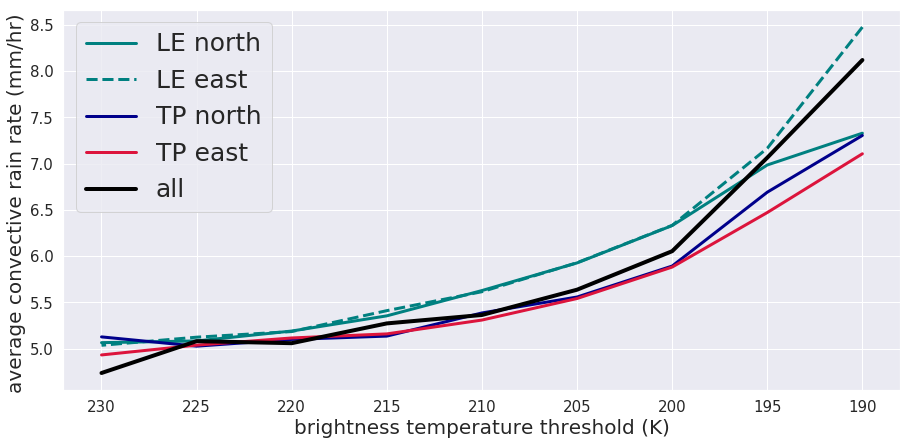

In [656]:
plt.figure(figsize= (15,7))

plt.plot(np.flip(thresholds, axis = 0 ), fractions_N, c= 'teal', label= 'LE north', linewidth =3.0)
plt.plot(np.flip(thresholds, axis = 0 ), fractions_E, c= 'teal', label= 'LE east', linewidth= 3.0, linestyle = '--')
plt.plot(np.flip(thresholds, axis = 0 ), fractions_n, c= 'darkblue', label = 'TP north', linewidth= 3.0)
plt.plot(np.flip(thresholds, axis = 0 ), fractions_e, c= 'crimson', label = 'TP east', linewidth= 3.0)
plt.plot(np.flip(thresholds, axis = 0 ), fractions, c= 'black', label= 'all', linewidth= 4.0)

#plt.plot(np.flip(thresholds, axis = 0 ), areas_N, c= 'teal', label= 'LE north', linewidth =3.0)
#plt.plot(np.flip(thresholds, axis = 0 ), areas_E, c= 'teal', label= 'LE east', linewidth= 3.0, linestyle = '--')
#plt.plot(np.flip(thresholds, axis = 0 ), areas_n, c= 'darkblue', label = 'TP north', linewidth= 3.0)
#plt.plot(np.flip(thresholds, axis = 0 ), areas_e, c= 'crimson', label = 'TP east', linewidth= 3.0)
#plt.plot(np.flip(thresholds, axis = 0 ), areas, c= 'black', label= 'all', linewidth= 4.0)


plt.legend(fontsize= 25 )
plt.xticks(thresholds, np.linspace(230,190, 9).astype(int))
plt.xlabel('brightness temperature threshold (K)', fontsize = 20)
plt.ylabel('average convective rain rate (mm/hr) ', fontsize= 20)

plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 


plt.savefig('convective_precip_strentgh_ctt.png')

In [592]:
# convective areas 

def get_area(tracks):
    a= []
    for cell in np.unique(tracks.cell.values):
        area= np.mean(tracks[tracks.cell== cell].rain_flag.values)
        a.append(area)
    areas = np.array(a)
    histo = np.histogram(areas, bins=(100, 200, 300, 400, 500, 600, 700, 800, 1000, 1100, 1200, 1300,1400, 1500, 1600 ))
    print('area histo calculated.')
    return histo


In [593]:
a_precip= get_area(tracks_N)
a_tbb_rain= get_area(tracks_E)
a_tbb_cold= get_area(tracks_n)
a_tbb= get_area(tracks_e)

area histo calculated.
area histo calculated.
area histo calculated.
area histo calculated.


## What amount of the time are the clouds also raining?

90 % of the time it is raining more than 500 mm integrated over the MCS area. 



In [792]:
print(tracks_e[tracks_e.total_precip < 500 ].shape[0]/ tracks_e.shape[0] * 100)
print(tracks_E[tracks_E.total_precip < 500 ].shape[0]/ tracks_E.shape[0] * 100)
print(tracks_n[tracks_n.total_precip < 500 ].shape[0]/ tracks_n.shape[0] * 100) 
print(tracks_N[tracks_N.total_precip < 500 ].shape[0]/ tracks_N.shape[0] * 100) 

11.257135958331176
12.699293535099141
11.051531176977
13.468728606786145


## total precipitation from convective vs. stratiform: 60 - 65% 

In [779]:
print(np.nanmean(tracks_e.convective_precip.values)/ np.nanmean(tracks_e.total_precip.values))
print(np.nanmean(tracks_n.convective_precip.values)/ np.nanmean(tracks_n.total_precip.values) )
print(np.nanmean(tracks_E.convective_precip.values)/ np.nanmean(tracks_E.total_precip.values)) 
print(np.nanmean(tracks_N.convective_precip.values)/ np.nanmean(tracks_N.total_precip.values)) 

0.6365978323140237
0.6243829574789251
0.6629025892727849
0.6533776659034071


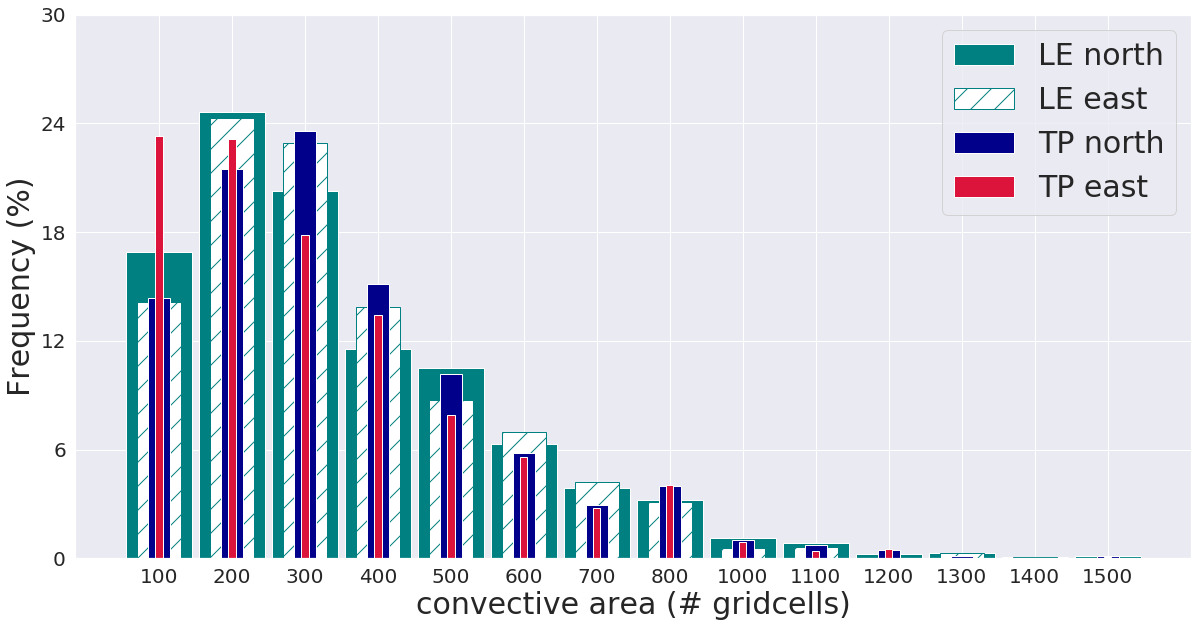

In [594]:
bins = a_tbb[1]
plt.figure(figsize=(20,10))

ticks =np.arange(bins.shape[0]-1 )


plt.bar(ticks, a_tbb_rain[0]/ np.nansum(a_tbb_rain[0]) * 100 , label= 'LE north', width=0.9,color= 'teal')
plt.bar(ticks , a_tbb_cold[0]/ np.nansum(a_tbb_cold[0]) * 100 , label = 'LE east', width = 0.6  ,hatch= '/', edgecolor= 'teal', color= 'white')
plt.bar(ticks , a_tbb[0]/ np.nansum(a_tbb[0]) * 100 , label= 'TP north', width= 0.3 , color= 'darkblue')
plt.bar(ticks , a_precip[0]/ np.nansum(a_precip[0]) * 100 , label='TP east', width = 0.1, color= 'crimson')

plt.legend(fontsize= 30)

plt.xticks(ticks , bins[:], fontsize = 20)
plt.yticks(np.linspace(0,30,6), fontsize= 20 )

plt.xlabel('convective area (# gridcells)', fontsize= 30)
plt.ylabel('Frequency (%)', fontsize= 30)
plt.savefig('/media/juli/Data/projects/mcs_tracking/CTT/analysis/convectivearea_mcsclasses.png')
plt.show()

In [610]:
# examples for extreme convective core 

subset= tracks_e[tracks_e.tp_flag == tracks_e.rain_flag]
tp = subset[subset.convective_precip == np.max(subset.convective_precip.values)]
tp.idx

68293    667
Name: idx, dtype: object

In [596]:
tracks_N[tracks_N.convective_precip == np.max(tracks_N.convective_precip.values)]

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,latitude,...,ncells,cell,time_cell,rain_flag,tp_flag,total_precip,convective_precip,v,dir,hour
69631,9529,746,64.034176,283.882518,196,210,12633,2008-06-16 13:00:00,2008-06-16 13:00:00,21.353418,...,389,11287.0,0 days,2005,0,28547.222656,26896.439453,12.320648,N,13


In [562]:
# convective vs stratiform 
t = np.sum(tracks_e.total_precip.values)
s= np.sum(tracks_e.total_precip.values - tracks_e.convective_precip.values)
c= np.sum(tracks_e.convective_precip.values)

print(c/t, s/t) 

0.6365978323140236 0.36340216768597644


## cells with highest environmental impact

In [1091]:
def environmental_impact(tracks):
    impact_factor = []
    for cell in np.unique(tracks.cell.values):
        subset= tracks[tracks.cell == cell]
        en_impact =  np.nanmean(subset.convective_precip.values/subset.v.values)
        impact_factor.append(en_impact)  
    return impact_factor
    

In [1092]:
impact_e = environmental_impact(tracks_e)
impact_n = environmental_impact(tracks_n)
impact_E = environmental_impact(tracks_E)
impact_N = environmental_impact(tracks_N)

In [1090]:
tracks_e['env_imp'] = tracks_e.convective_precip/ tracks_e.v
tracks_E['env_imp'] = tracks_E.convective_precip/ tracks_E.v
tracks_n['env_imp'] = tracks_n.convective_precip/ tracks_n.v
tracks_N['env_imp'] = tracks_N.convective_precip/ tracks_N.v

In [770]:
print(impact_e[-10:-1])
print(impact_n[-10:-1])
print(impact_E[-10:-1])
print(impact_N[-10:-1])

[ 665.81383579  665.81596814  696.47699215  737.44185281  944.59944677
 1006.65728594 1033.43763203 1037.13743115 1061.55605617]
[624.43277994 631.61548463 650.76297116 663.56629738 667.57099246
 725.62120308 757.56469674 882.46243448 919.59014277]
[ 739.68389705  789.78297897  847.78643103  862.99376848  886.59515454
  930.91231939  933.48477617 1076.09055805 1129.71096683]
[ 677.08746922  714.60599656  717.26881485  720.76094779  768.42907165
  852.46688291  860.19344401  891.47584976 1030.57010353]


In [1019]:
e_histo, bins = np.histogram(impact_e, bins= np.linspace(300,900,13))
N_histo, bins = np.histogram(impact_N, bins= np.linspace(300,900, 13))
n_histo, bins = np.histogram(impact_n, bins= np.linspace(300,900, 13))
E_histo, bins = np.histogram(impact_E, bins= np.linspace(300,900, 13))


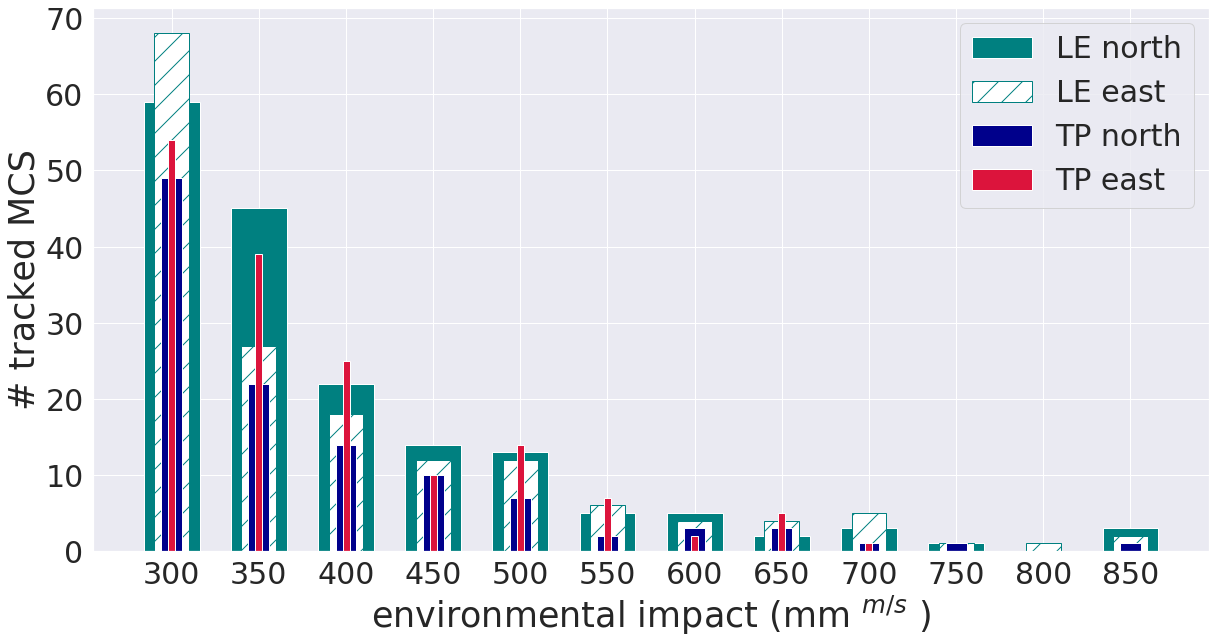

In [1093]:
sns.set()

plt.figure(figsize=(20,10))

plt.bar(bins[:-1] , N_histo, label= 'LE north', width=0.8*40,color= 'teal')
plt.bar(bins[:-1] , E_histo, label = 'LE east', width = 0.5*40,hatch= '/', edgecolor= 'teal', color= 'white')
plt.bar(bins[:-1] , n_histo, label= 'TP north', width= 0.3*40, color= 'darkblue')
plt.bar(bins[:-1] , e_histo, label='TP east', width = 0.1*40, color= 'crimson')


plt.legend(fontsize= 30)
plt.yticks(np.arange(0,75)[::10], fontsize = 30)
plt.xticks(bins.astype(int)[:-1], fontsize= 30)


plt.xlabel('environmental impact (mm $^{m/s}$ )', fontsize= 35)
plt.ylabel('# tracked MCS', fontsize= 35)

plt.savefig('evironmental_impact_mcsclasses.png')
plt.show()

## Box plots for environmental impact 

In [1269]:
e = list(tracks_e.convective_precip.values)
E = list(tracks_E.convective_precip.values)
n = list(tracks_n.convective_precip.values)
N = list(tracks_N.convective_precip.values)

In [ ]:
data = [e,E,n,N]
fig, ax = plt.subplots(figsize= (20,10))
ax.set_title('Multiple Samples with Different sizes')
ax.boxplot(data)



## dataframe with all MCS types for lifetime, area and intensity categories

**Categories:**

- lifetime: 6 - 12 , 12 - 24, > 24 
- area: 500-1000, 1000-2000, > 2000 
- intensity: 230-225, 220 - 210, < 210

In [1719]:
# setting categories 
df.loc[(df.speed < 10) , 'speed'] = 9
df.loc[(df.speed >= 10 ) & (df.speed<= 15 )  , 'speed'] = 12
df.loc[(df.speed  > 15),'speed']= 15

In [1693]:
# setting categories 
df.loc[(df.lifetime <= 12) , 'lifetime'] = 6
df.loc[(df.lifetime > 12 ) & (df.lifetime <24 )  , 'lifetime'] = 12
df.loc[(df.lifetime  > 24),'lifetime']= 24

df.loc[(df.area  <= 1000),'area']= 500
df.loc[(df.area > 1000 ) & (df.area < 2000)  , 'area'] = 1000
df.loc[(df.area > 2000)  , 'area'] = 2000

df.loc[(df.intensity <= 210),'intensity']= 195
df.loc[(df.intensity < 225 ) & (df.intensity > 210)  , 'intensity'] = 210
df.loc[(df.intensity > 225 ) , 'intensity'] = 225

# change values of total convective precipitation 
df['conv_precip'] = df.conv_precip.values/ 100000

# change categories to string labels 
df.loc[df.mcs == 'N', 'mcs'] = 'LE north'
df.loc[df.mcs == 'E', 'mcs'] = 'LE east'
df.loc[df.mcs == 'e', 'mcs'] = 'TP east'
df.loc[df.mcs == 'n', 'mcs'] = 'TP north'



In [194]:
df =pd.read_hdf('cell_statistics.h5', 'table')


In [188]:
np.unique(df.mcs.values)


array(['LE east', 'LE north', 'TP east', 'TP north'], dtype=object)

In [184]:
df= pd.DataFrame(columns = ['mcs', 'lifetime', 'area', 'intensity', 'env_imp', 'conv_precip', 'cell', 'time', 'speed'])


In [1692]:
tracks = tracks_E
mcstype= 'E'

for y in np.arange(2000,2020):
    yeartracks = tracks[tracks.year== y ]
    for cell in np.unique(yeartracks.cell.values):
        subset= yeartracks[yeartracks.cell == cell]
        time = subset.time.values[0]
        lt = subset.shape[0] * 0.5 
        area = np.mean(subset.ncells.values)
        intensity  = np.nanmax(subset.threshold_value.values)
        env_imp = np.nanmean(subset.env_imp.values)
        conv_precip= np.nansum(subset.convective_precip.values)
        v = np.nanmean(subset.v.values)
        df = df.append({'mcs':mcstype, 'lifetime': lt , 'area': area, 'intensity': intensity, 'env_imp':env_imp, 'conv_precip':conv_precip, 'cell':cell,'time':time, 'speed':v, }, ignore_index = True)


In [1581]:
select = df.sort_values(by = 'conv_precip', ascending = False)
s1 = select.iloc[0:1000,:]

In [1582]:
select = df.sort_values(by = 'env_imp', ascending = False)
s2 = select.iloc[0:1000,:]

In [1583]:
check = np.isin(s1.cell.values, s2.cell.values)
check[check == True].shape

(469,)

In [189]:
# read in TP init cells 
tp_cells = pd.read_hdf('tpcells.h5', 'table')
cells= np.unique(tp_cells.cell.values)


In [237]:
# get datapoints for Tibetan cells in boxplot 

xl= np.array(())
xa= np.array(())
xi= np.array(())
y = np.array(())

for c in cells:
    lt = df[(df.cell == c) & (df.mcs == 'TP east')].lifetime.values[0]
    xl= np.append(xl, lt )
    if lt == 24:
        print('lt',df[(df.cell == c)].time, c)
    xa= np.append(xa, df[(df.cell == c) & (df.mcs == 'TP east')].area.values[0])
    intensity = df[(df.cell == c) & (df.mcs == 'TP east')].intensity.values[0]
    if intensity == 195:
        print('I',df[(df.cell == c)].time, c)
    xi= np.append(xi, intensity)
    y = np.append(y, df[(df.cell == c) & (df.mcs == 'TP east')].conv_precip.values[0])
    


lt 5195   2018-06-30 09:00:00
Name: time, dtype: datetime64[ns] 11472.0
I 4870   2015-06-29 08:00:00
Name: time, dtype: datetime64[ns] 12068.0
I 965    2010-05-31 17:30:00
4675   2013-07-03 13:30:00
4902   2015-07-23 17:30:00
Name: time, dtype: datetime64[ns] 14025.0
lt 5021   2016-07-17 19:00:00
Name: time, dtype: datetime64[ns] 14318.0
lt 3451   2001-07-28 20:30:00
Name: time, dtype: datetime64[ns] 16042.0
I 4050   2007-08-07 11:00:00
Name: time, dtype: datetime64[ns] 16724.0


IndexError: index 0 is out of bounds for axis 0 with size 0

In [226]:
xl[xl == 6.0] = 0
xl[xl == 12.0] = 1
xl[xl == 24.0] = 2

xa[xa == 500] = 0
xa[xa == 1000] = 1
xa[xa == 2000] = 2

xi[xi == 195] = 0
xi[xi == 210] = 1
xi[xi == 225] = 2


In [225]:
# show TPV case in plot as well 
tpvcell = 14548.0
tpv = tracks_e[tracks_e.cell == tpvcell ]
tx = df[df.cell == tpvcell].lifetime.values[1]
ta = df[df.cell == tpvcell].area.values[1]
ti = df[df.cell == tpvcell].intensity.values[1]
ty= df[df.cell == tpvcell].conv_precip.values[1]

ta = 2 
tx = 1
ti = 1

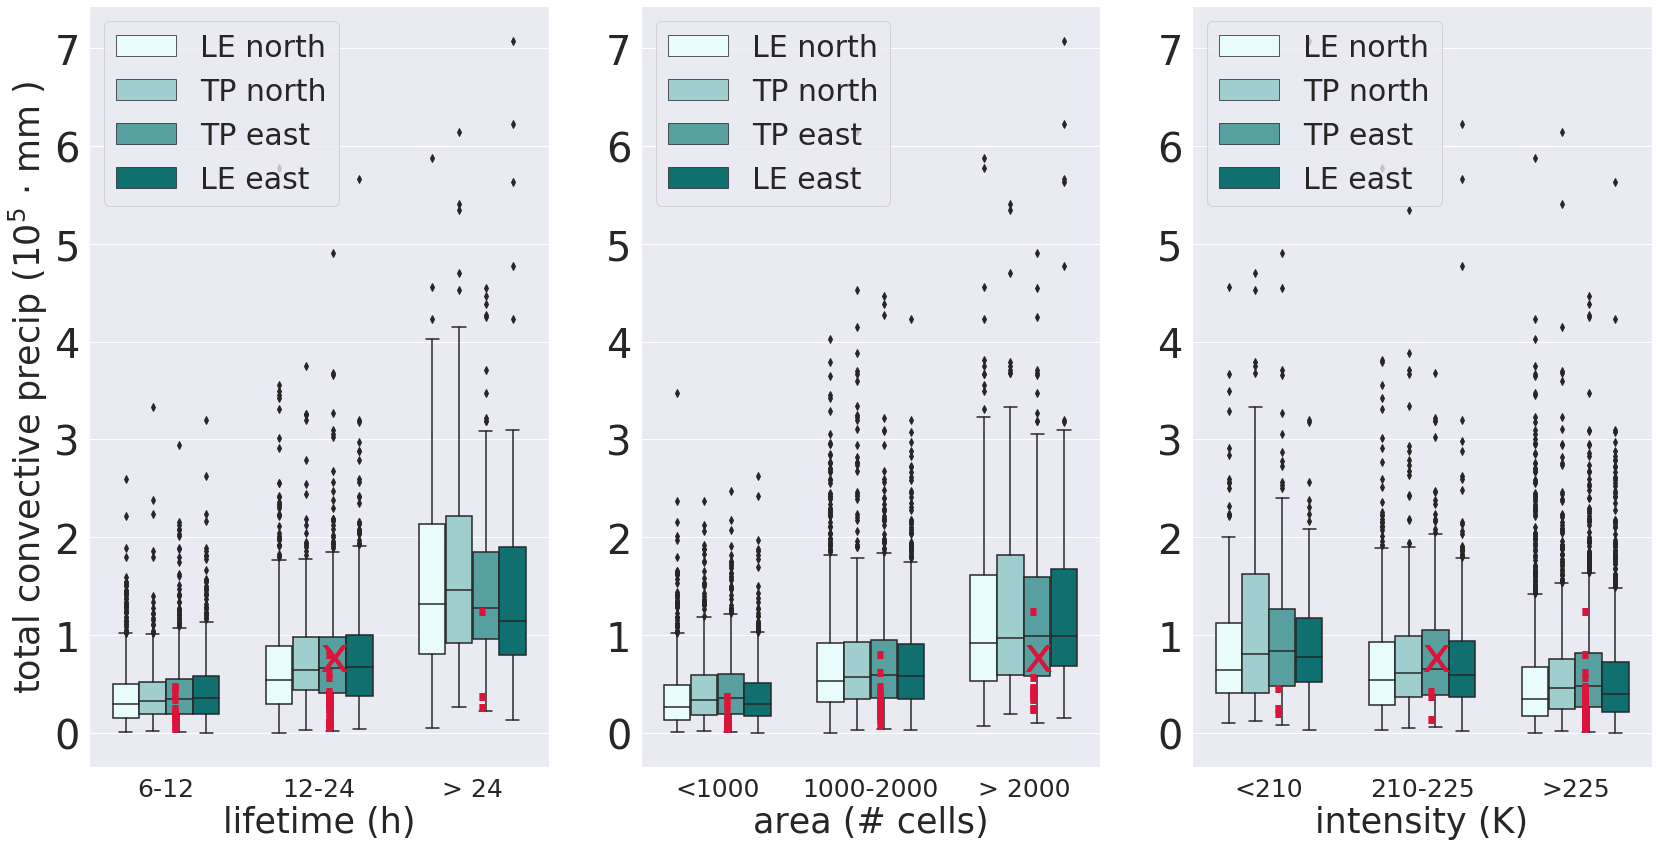

In [229]:
plt.figure(figsize= (28,14))

ax1 = plt.subplot(1, 3, 1) 

w= 0.7

a = sns.boxplot(y='conv_precip', x='lifetime', 
                 data=df, 
                 color = 'teal',
                 hue='mcs', width = w)


for i, x in enumerate(xl):
    yi = y[i]
    a.text(x,yi,'.', fontsize=60, color='crimson')

    
a.text(tx,ty,'x', fontsize=50, color='crimson')
    
ax2 = plt.subplot(1, 3, 2) 
b= sns.boxplot(y='conv_precip', x='area', 
                 data=df, 
                 color = 'teal',
                 hue='mcs', width = w)

for i, x in enumerate(xa):
    yi = y[i]
    b.text(x,yi,'.', fontsize=60, color='crimson')

b.text(ta,ty,'x', fontsize=50, color='crimson')

ax3 = plt.subplot(1, 3, 3) 
c = sns.boxplot(y='conv_precip', x='intensity', 
                 data=df, 
                 color = 'teal',
                 hue='mcs', width = w)

for i, x in enumerate(xi):
    yi = y[i]
    c.text(x,yi,'.', fontsize=60, color='crimson')

c.text(ti,ty,'x', fontsize=50, color='crimson')



ax1.set_ylabel('total convective precip (10$^5$ $\cdot$ mm )', fontsize = 35)
ax2.set_ylabel('', fontsize = 35)
ax3.set_ylabel('', fontsize = 35 )

ax1.set_xlabel('lifetime (h)', fontsize = 35)
ax2.set_xlabel('area (# cells)', fontsize = 35 )
ax3.set_xlabel('intensity (K)', fontsize = 35 )

ax1.set_xticklabels(['6-12', '12-24', '> 24'], fontsize = 25)
ax3.set_xticklabels(['<210', '210-225', '>225'], fontsize = 25)
ax2.set_xticklabels(['<1000', '1000-2000', '> 2000'], fontsize= 25)

ax1.legend(fontsize= 30)
ax2.legend(fontsize= 30)
ax3.legend(fontsize= 30)

plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=40) 


plt.savefig('plots/boxplot_convective_precip_tpmarked_updated.png')

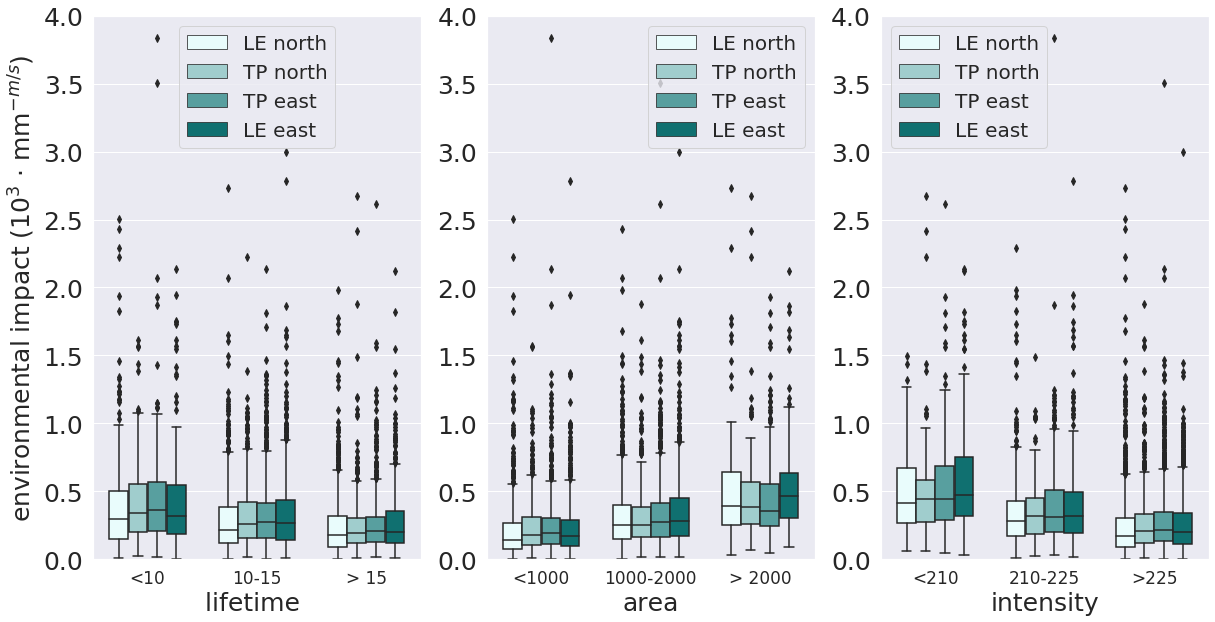

In [1728]:
plt.figure(figsize= (20,10))

ax1 = plt.subplot(1, 3, 1) 

w= 0.7

sns.boxplot(y='env_imp', x='speed', 
                 data=df, 
                 color = 'teal',
                 hue='mcs', width = w)


ax2 = plt.subplot(1, 3, 2) 
sns.boxplot(y= 'env_imp', x='area', 
                 data=df, 
                 color = 'teal',
                 hue='mcs', width = w)

ax3 = plt.subplot(1, 3, 3) 
sns.boxplot(y= 'env_imp', x='intensity', 
                 data=df, 
                 color = 'teal',
                 hue='mcs', width = w)

ax1.set_ylabel('environmental impact (10$^3$ $\cdot$ mm$^{- m/s}$)', fontsize = 25)
ax2.set_ylabel('', fontsize = 20 )
ax3.set_ylabel('', fontsize = 20 )

ax1.set_xlabel('speed ', fontsize = 20)
ax2.set_xlabel('area', fontsize = 20 )
ax3.set_xlabel('intensity', fontsize = 20 )

ax1.legend(fontsize= 20)
ax2.legend(fontsize= 20)
ax3.legend(fontsize= 20)

ax1.set_ylim(0,4)
ax2.set_ylim(0,4)
ax3.set_ylim(0,4)

ax1.set_xlabel('lifetime ', fontsize = 25)
ax2.set_xlabel('area', fontsize = 25 )
ax3.set_xlabel('intensity', fontsize = 25 )

ax1.set_xticklabels(['<10', '10-15', '> 15'], fontsize = 17)
ax3.set_xticklabels(['<210', '210-225', '>225'], fontsize = 17)
ax2.set_xticklabels(['<1000', '1000-2000', '> 2000'], fontsize= 17)


plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25) 

plt.savefig('plots/boxplot_environmental_impact.png')

## Trends of convective cells in TP region, any change in the past two decades? 

- change in total number together with total rainfall 
- change in environmental impact 


- change in number of cases with environmental impact higher than a certain amount 
- change in average intensity 

In [1053]:
tbbtracks['year'] = tbbtracks.time.dt.year
tbbtracks['month'] = tbbtracks.time.dt.month
tracks_e['year'] = tracks_e.time.dt.year
tracks_e['month'] = tracks_e.time.dt.month
tracks_E['year'] = tracks_E.time.dt.year
tracks_E['month'] = tracks_E.time.dt.month
tracks_n['year'] = tracks_n.time.dt.year
tracks_n['month'] = tracks_n.time.dt.month
tracks_N['year'] = tracks_N.time.dt.year
tracks_N['month'] = tracks_N.time.dt.month


In [1145]:
tracks_e.sort_values(by = 'env_imp', ascending = False)

e= tracks_e[tracks_e.env_imp > 2000]
E = tracks_E[tracks_E.env_imp > 2000]
n = tracks_n[tracks_n.env_imp > 2000]
N = tracks_N[tracks_N.env_imp > 2000]

e= tracks_e
E = tracks_E
n = tracks_n
N = tracks_N

In [1180]:
cellcountse = np.zeros(np.arange(2001,2019).shape)
cellcountsE = np.zeros(np.arange(2001,2019).shape)
cellcountsn = np.zeros(np.arange(2001,2019).shape)
cellcountsN = np.zeros(np.arange(2001,2019).shape)


for i,y in enumerate(np.arange(2000,2018)):
    year = e[e.year == y]
    months = np.unique(year.month.values).shape[0]
    cell= np.unique(year.cell.values).shape[0]
    cells = np.nansum(year.convective_precip.values)/ cell
    cellcountse[i] = cells
    
    year = E[E.year == y]
    months = np.unique(year.month.values).shape[0]
    cell = np.unique(year.cell.values).shape[0]
    cells = np.nansum(year.convective_precip.values)/ cell
    cellcountsE[i] = cells
    
    year = n[n.year == y]
    months = np.unique(year.month.values).shape[0]
    cell= np.unique(year.cell.values).shape[0]
    cells = np.nansum(year.convective_precip.values)/ cell
    cellcountsn[i] = cells
    
    year = N[N.year == y]
    months = np.unique(year.month.values).shape[0]
    cell = np.unique(year.cell.values).shape[0]
    cells = np.nansum(year.convective_precip.values)/ cell
    cellcountsN[i] = cells

In [53]:
contributions.columns

Index(['Unnamed: 0', 'year', 'month', 'tp_precip', 'le_precip',
       'tp_precip_mcs', 'le_precip_mcs', 'convective_tp', 'convective_le',
       'convective_tp_mcs', 'convective_le_mcs'],
      dtype='object')

## Interannual variability of MCS and precipitation 

- TP precip 
- total domain precip 

- total # MCS partly over TP 
- total # heavy impact MCS (convective precip > 95th percentile, ca. 100 cells)

**Do wet years also mean a higher contribution through MCS?** 

In [808]:
heavyimpact = get_largest(tbbtracks)

[1035]


In [958]:
import xarray as xr
file = '/media/juli/Elements/gpm_v06/gpm_2000_2019_domainmean.nc'
precip_timeseries = xr.open_dataset(file)['precipitationCal'][:,0,0]
precip_timeseries = precip_timeseries.values*48*31*12

In [959]:
file = '/media/juli/Elements/gpm_v06/gpm_2000_2019.nc'
precip = xr.open_dataset(file)['precipitationCal'][:,:-1,:-1]


# extract only TP elevation 
# apply elevation mask                                                                                                                                         
mask = elevations.where(elevations >=  3000)
mask.coords['mask'] = (('lon', 'lat'), mask)


tp_timeseries = np.array(())
# get precipitation over plateau  

for t in np.arange(20):
    p = precip[t,:,:]
    P = p.where(mask.coords['mask'].values > 0)
    arr= P.values.flatten()
    values = arr[~np.isnan(arr)]
    tp_timeseries=np.append(tp_timeseries, np.nanmean(values))
    
tp_timeseries = tp_timeseries*48*31*12

In [809]:
heavyimpact['year'] = heavyimpact.time.dt.year.values
cells = heavyimpact.groupby('cell').mean()
heavyimpact_cells = cells.groupby('year').count().v.values 

tp['year'] = tp.time.dt.year.values
cells_tp = tp.groupby('cell').mean()
tpmcs = cells_tp.groupby('year').count().v.values 




<Figure size 864x360 with 0 Axes>

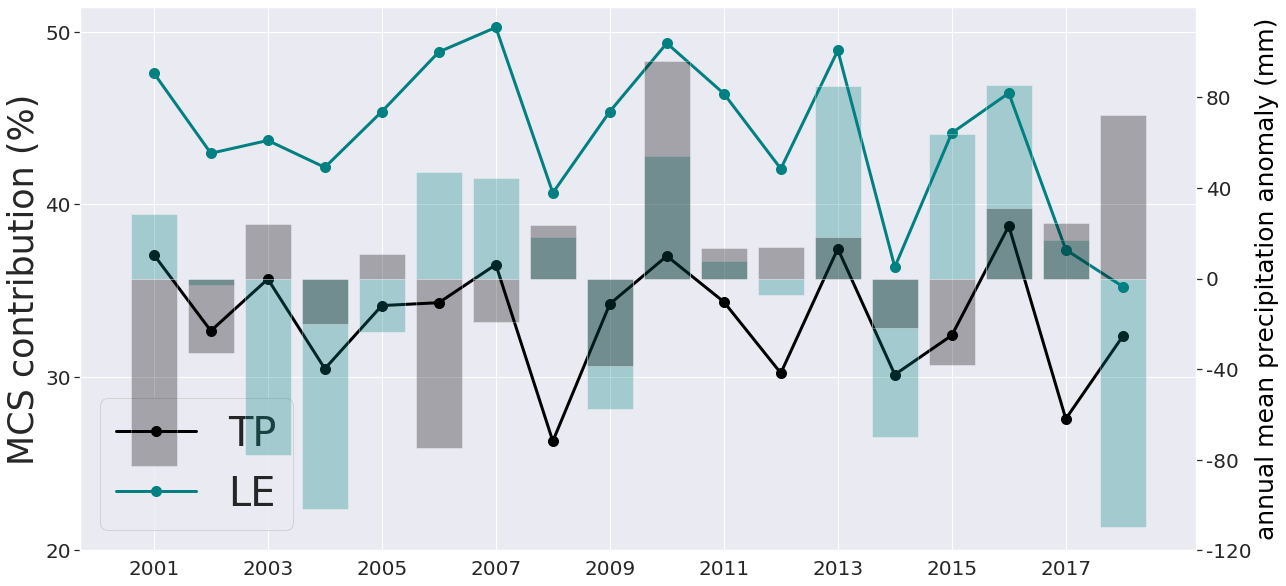

In [971]:
contr_mcs = contributions.groupby('year').sum()['tp_precip_mcs']/ contributions.groupby('year').sum()['tp_precip'] * 100 
contr_mcs_le = contributions.groupby('year').sum()['le_precip_mcs']/ contributions.groupby('year').sum()['le_precip'] * 100 

annual_tp = contributions.groupby('year').sum()['tp_precip']
annual_le = contributions.groupby('year').sum()['le_precip']
precip_tp = annual_tp/ contributions.groupby('year').sum()['month']
precip_le = annual_le/ contributions.groupby('year').sum()['month']


# annual precipitation > 3000 m ASL 
# annual precip total domain 

years = np.arange(2001,2019)
plt.figure(figsize = (12,5))

fig, ax1 = plt.subplots(figsize= (20,10))

plt.plot(grid = False)

ax1.plot(years, contr_mcs.values[1:-1], color = 'black', marker = 'o', label ='TP', markersize= 10, linewidth= 3.0 )
ax1.plot(years, contr_mcs_le.values[1:-1], color = 'teal', marker = 'o', label ='LE', markersize= 10, linewidth= 3.0 )
ax1.set_ylabel('MCS contribution (%)', fontsize= 35)
ax1.set_xticks(np.arange(2001,2019)[::2])
ax1.set_xticklabels(np.arange(2001,2019)[::2], fontsize = 20 )
ax1.set_yticks(np.arange(20,60)[::10])
ax1.set_yticklabels(np.arange(20,60)[::10], fontsize = 20 )


plt.legend(fontsize = 40 )
norm = 180337 / 20 

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'black'
ax2.set_ylabel('annual mean precipitation anomaly (mm)', color=color, fontsize= 25)  # we already handled the x-label with ax1

le_precip = precip_timeseries[1:-1] - tp_timeseries[1:-1]
ax2.bar(years, le_precip - np.mean(le_precip) , color = 'teal' , alpha= 0.3)
ax2.bar(years, tp_timeseries[1:-1] - np.mean(tp_timeseries[1:-1] ), color = 'black', alpha = 0.3 )
ax2.grid(False) 
ax2.set_ylim(-120,120)
ax2.set_yticks(np.arange(-120,120)[::40])
ax2.set_yticklabels(np.arange(-120,120)[::40], fontsize = 20 )



plt.savefig('plots/timeseries_mcscontribution.png')

plt.show()


<Figure size 1440x720 with 0 Axes>

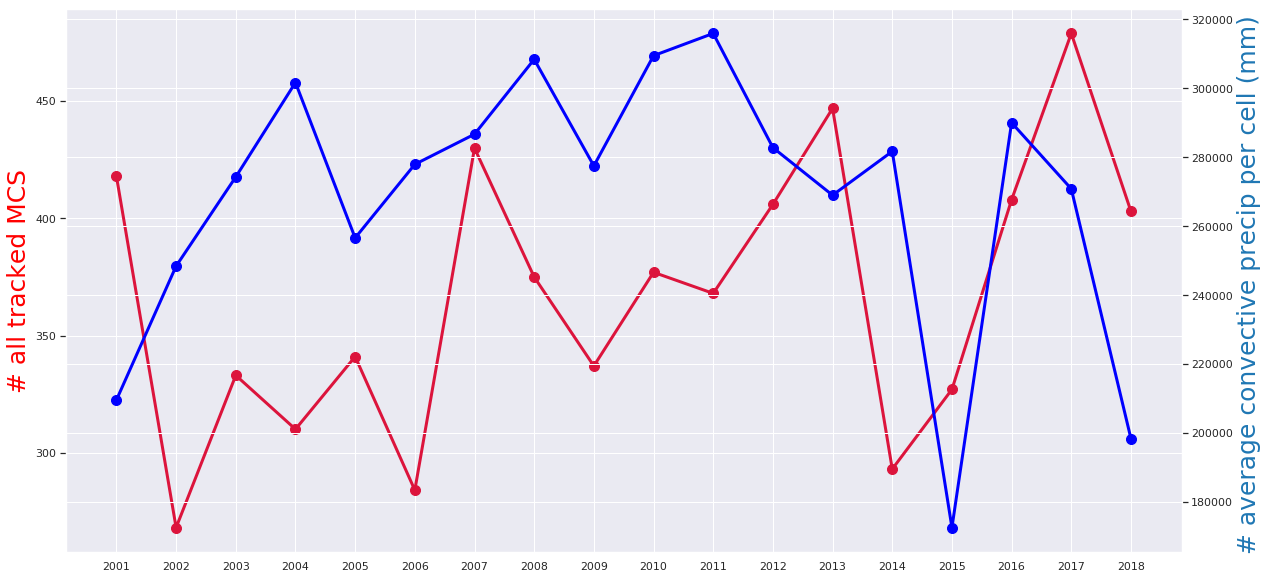

In [1183]:
years = np.arange(2001,2019)
plt.figure(figsize = (20,10))

fig, ax1 = plt.subplots(figsize= (20,10))

plt.plot(grid = False)
ax1.set_ylabel('# all tracked MCS', color='red', fontsize= 25 )
ax1.plot(years, cellcounts_e+ cellcounts_E + cellcounts_n + cellcounts_N , color = 'crimson', marker = 'o', label ='# all tracked MCS', markersize= 10, linewidth= 3.0 )

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('# average convective precip per cell (mm) ', color=color, fontsize= 25)  # we already handled the x-label with ax1
ax2.plot(years, cellcountse+ cellcountsE + cellcountsn + cellcountsN , color = 'blue', marker = 'o', label ='convective precip per cell', markersize= 10, linewidth= 3.0 )


#plt.legend(fontsize = 30)
#plt.yticks(np.arange(0,600)[::100], fontsize= 25 ) 
plt.xticks(years.astype(int), fontsize= 15)



plt.savefig('timeseries_convectiveprecip_percell.png')

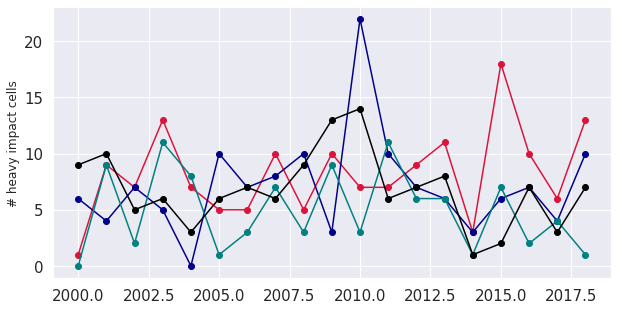

In [862]:
years = np.arange(2000,2019)
plt.figure(figsize = (10,5))
plt.plot(years, cellcounts_e, color = 'crimson', marker = 'o')
plt.plot(years, cellcounts_E, color= 'darkblue', marker= 'o')
plt.plot(years, cellcounts_n, color = 'teal', marker= 'o')
plt.plot(years, cellcounts_N, color ='black', marker = 'o')

plt.ylabel('# heavy impact cells')

plt.savefig('timeseries_environmental_impact.png')

In [1175]:
cellcounts_e = np.zeros(np.arange(2001,2019).shape)
cellcounts_E = np.zeros(np.arange(2001,2019).shape)
cellcounts_n = np.zeros(np.arange(2001,2019).shape)
cellcounts_N = np.zeros(np.arange(2001,2019).shape)


for i,y in enumerate(np.arange(2001,2019)):
    year = tracks_e[tracks_e.year == y]
    months = np.unique(year.month.values).shape[0]
    cells= np.unique(year.cell.values).shape[0]
    cellcounts_e[i] = cells
    
    year = tracks_E[tracks_E.year == y]
    months = np.unique(year.month.values).shape[0]
    cells= np.unique(year.cell.values).shape[0]
    cellcounts_E[i] = cells
    
    year = tracks_n[tracks_n.year == y]
    months = np.unique(year.month.values).shape[0]
    cells= np.unique(year.cell.values).shape[0]
    cellcounts_n[i] = cells
    
    year = tracks_N[tracks_N.year == y]
    months = np.unique(year.month.values).shape[0]
    cells= np.unique(year.cell.values).shape[0]
    cellcounts_N[i] = cells

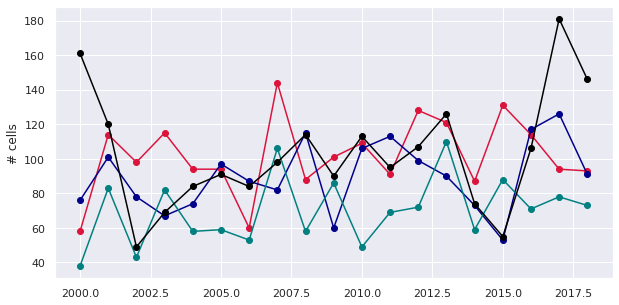

In [1063]:
years = np.arange(2000,2019)
plt.figure(figsize = (10,5))

plt.plot(years, cellcounts_e, color = 'crimson', marker = 'o')
plt.plot(years, cellcounts_E, color= 'darkblue', marker= 'o')
plt.plot(years, cellcounts_n, color = 'teal', marker= 'o')
plt.plot(years, cellcounts_N, color ='black', marker = 'o')

plt.ylabel('# cells')

plt.savefig('timeseries_totalnumber.png')

## Lifetime vs. intensity for different years 






